In [ ]:
pip install plotly
pip install kneed

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import scipy.stats
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from kneed import KneeLocator

In [2]:
city_years = {
 'Paz':[2016,2017,2018,2019,2020,2021,2022,2023],
}

In [3]:
path = '/Users/zahrafarook/Desktop/DataAnalysis/data/Bolivia/La_Paz'
dir_list = os.listdir(path)
print(dir_list)

['La_Paz_2020.csv', 'La_Paz_2021.csv', 'La_Paz_2023.csv', 'La_Paz_2022.csv', 'La_Paz_2019.csv', 'La_Paz_2018.csv', 'La_Paz_2016.csv', 'La_Paz_2017.csv']


In [4]:
dfs = defaultdict(dict)
dfall = []


for city, years in city_years.items():
    for year in years:
        print("Loading: ", city, year)

        df = pd.read_csv("/Users/zahrafarook/Desktop/DataAnalysis/data/Bolivia/La_Paz/La_{}_{}.csv".format(city, year))
       
        #creating a column to add weekend or weekday
        df['time_observed_at'] = pd.to_datetime(df['time_observed_at'], utc=True)
        df['day_of_week'] = df['time_observed_at'].dt.dayofweek
        df['day_type'] = df['time_observed_at'].apply(lambda x: 'Weekend' if x.weekday() in [5, 6] else 'Weekday')
        dfs[city][year] = df
        dfall.append(df)

dfall = pd.concat(dfall)
dfs['Paz'][2016].head()

Loading:  Paz 2016
Loading:  Paz 2017
Loading:  Paz 2018
Loading:  Paz 2019
Loading:  Paz 2020
Loading:  Paz 2021
Loading:  Paz 2022
Loading:  Paz 2023


,id,observed_on_string,observed_on,time_observed_at,created_time_zone,created_at,updated_at,description,user_id,quality_grade,...,taxon_rank,taxon_parent_id,taxon_native,taxon_endemic,taxon_threatened,taxon_search_rank,taxon_observations,identifications,day_of_week,day_type
0,2715519,2016-02-23,2016-02-23,NaT,America/La_Paz,2016-02-25T13:28:17-04:00,2018-07-17T17:47:14-04:00,"Solanacea probablemente del género Solanum, mu...",172457,needs_id,...,genus,634950,False,False,False,460045,460045,"[{'user_id': 59227, 'category': 'improving', '...",NaN,Weekday
1,2715558,2016-02-23,2016-02-23,NaT,America/La_Paz,2016-02-25T13:35:03-04:00,2020-02-04T11:51:00-04:00,"Cactus que crecía en aparente en colonia, se a...",172457,research,...,species,321329,False,False,False,824,824,"[{'user_id': 172457, 'category': 'improving', ...",NaN,Weekday
2,2715563,2016-02-23,2016-02-23,NaT,America/La_Paz,2016-02-25T13:38:04-04:00,2016-03-25T16:31:24-04:00,varias especies de musgo y liquen creciendo en...,172457,needs_id,...,class,311249,False,False,False,882928,882928,"[{'user_id': 44389, 'category': 'leading', 'di...",NaN,Weekday
3,2715570,2016-02-23,2016-02-23,NaT,America/La_Paz,2016-02-25T13:41:57-04:00,2021-09-29T16:39:11-04:00,Planta acuática creciendo cerca a la orilla de...,172457,needs_id,...,class,47125,False,False,False,12330031,12330031,"[{'user_id': 574110, 'category': 'improving', ...",NaN,Weekday
4,2715662,2016-02-23,2016-02-23,NaT,America/La_Paz,2016-02-25T14:40:52-04:00,2023-03-14T02:03:07-04:00,Paloma de tamaño grande cerca a la cumbre del ...,172457,needs_id,...,genus,2715,False,False,False,35762,35762,"[{'user_id': 172457, 'category': 'improving', ...",NaN,Weekday


In [5]:
sf_2016 = dfs['Paz'][2016]
sf_2017 = dfs['Paz'][2017]
sf_2018 = dfs['Paz'][2018]
sf_2019 = dfs['Paz'][2019]
sf_2020 = dfs['Paz'][2020]
sf_2021 = dfs['Paz'][2021]
sf_2022 = dfs['Paz'][2022]
sf_2023 = dfs['Paz'][2023]

In [6]:
sf_2016.head()

,id,observed_on_string,observed_on,time_observed_at,created_time_zone,created_at,updated_at,description,user_id,quality_grade,...,taxon_rank,taxon_parent_id,taxon_native,taxon_endemic,taxon_threatened,taxon_search_rank,taxon_observations,identifications,day_of_week,day_type
0,2715519,2016-02-23,2016-02-23,NaT,America/La_Paz,2016-02-25T13:28:17-04:00,2018-07-17T17:47:14-04:00,"Solanacea probablemente del género Solanum, mu...",172457,needs_id,...,genus,634950,False,False,False,460045,460045,"[{'user_id': 59227, 'category': 'improving', '...",NaN,Weekday
1,2715558,2016-02-23,2016-02-23,NaT,America/La_Paz,2016-02-25T13:35:03-04:00,2020-02-04T11:51:00-04:00,"Cactus que crecía en aparente en colonia, se a...",172457,research,...,species,321329,False,False,False,824,824,"[{'user_id': 172457, 'category': 'improving', ...",NaN,Weekday
2,2715563,2016-02-23,2016-02-23,NaT,America/La_Paz,2016-02-25T13:38:04-04:00,2016-03-25T16:31:24-04:00,varias especies de musgo y liquen creciendo en...,172457,needs_id,...,class,311249,False,False,False,882928,882928,"[{'user_id': 44389, 'category': 'leading', 'di...",NaN,Weekday
3,2715570,2016-02-23,2016-02-23,NaT,America/La_Paz,2016-02-25T13:41:57-04:00,2021-09-29T16:39:11-04:00,Planta acuática creciendo cerca a la orilla de...,172457,needs_id,...,class,47125,False,False,False,12330031,12330031,"[{'user_id': 574110, 'category': 'improving', ...",NaN,Weekday
4,2715662,2016-02-23,2016-02-23,NaT,America/La_Paz,2016-02-25T14:40:52-04:00,2023-03-14T02:03:07-04:00,Paloma de tamaño grande cerca a la cumbre del ...,172457,needs_id,...,genus,2715,False,False,False,35762,35762,"[{'user_id': 172457, 'category': 'improving', ...",NaN,Weekday


# Calculate participation

## Get number of observations and identifications

In [7]:
def get_obs_ident_per_users(dfcity,year):
    """ Calculate the number of observations and identifications per user 
    
    Input:
    ------
     - dfcity: pd.DataFrame
         The observations data for one city.
     - year: int
         The year corresponding to the observations data.
    
    Returns:
    -------
     - dfobsident: pd.DataFrame
         Has the columns: user_id | year | n_obs | n_idents
    """
    
    n_obs = defaultdict(int)
    n_idents = defaultdict(int)
    
    for _, row in dfcity.iterrows():
        # Total count of observation made by each users
        user_obs = row['user_id']
        n_obs[user_obs] += 1 # Increment observation count for the user
        
        # Total identification user made
        identifications = row['identifications']
        if not pd.isnull(identifications):  # Check if 'identifications' is not NaN
            identifications = eval(identifications)
            for ident in identifications:
                user_ident = ident['user_id']
                if user_ident != user_obs:
                    n_idents[user_ident] += 1 # Increment identification count for the user
    
    # Aggregating results into a list of dictionaries
    obs_ident_list = []
    for user_id, obs_count in n_obs.items():
        obs_ident_list.append({
            'user_id': user_id,
            'n_obs': obs_count,
            'n_idents': n_idents[user_id],
            'day_type': row['day_type'],  # Include the 'day_type' column in the result
            'year': year,
            'time_observed_at': row['time_observed_at']
            
            
        })
    
    # Create DataFrame from the list of dictionaries
    dfobsident = pd.DataFrame(obs_ident_list)
    
    return dfobsident

In [8]:
# Initialize empty dictionary to store results for each year
sf_dataframes = {}

# Iterate over the years
for year in range(2016, 2024):
    # Extract DataFrame for the current year and city 'SF'
    dfcity = dfs['Paz'][year]
    # Process data for the current year
    sf_dataframes[year] = get_obs_ident_per_users(dfcity, year)

#access dataframe for each year

In [9]:
sf_2016 = sf_dataframes[2016]
sf_2017 = sf_dataframes[2017]
sf_2018 = sf_dataframes[2018]
sf_2019 = sf_dataframes[2019]
sf_2020 = sf_dataframes[2020]
sf_2021 = sf_dataframes[2021]
sf_2022 = sf_dataframes[2022]
sf_2023 = sf_dataframes[2023]

In [10]:
df= [sf_2016,sf_2017,sf_2018,sf_2019,sf_2020,sf_2021,sf_2022,sf_2023]

In [11]:
#Test with SF_2016 dataset 

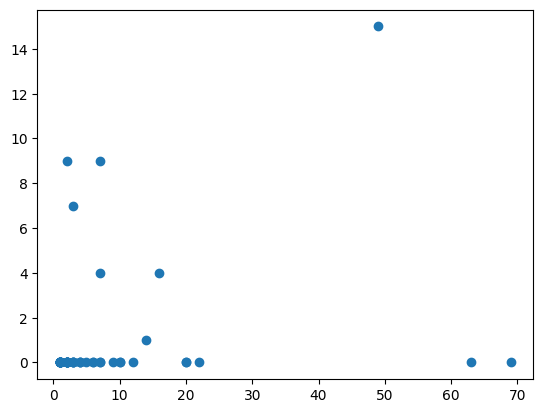

In [12]:
#Plot
plt.scatter(sf_2016['n_obs'],sf_2016['n_idents'])

In [13]:
km = KMeans(n_clusters =4)
km

KMeans(n_clusters=4)

In [ ]:
y_predicted = km.fit_predict(sf_2016[['n_obs','n_idents']])
y_predicted

In [ ]:
sf_2016['cluster'] = y_predicted
sf_2016.head()

In [ ]:
df1 = sf_2016[sf_2016.cluster==0]
df2 = sf_2016[sf_2016.cluster==1]
df3 = sf_2016[sf_2016.cluster==2]

df4 = sf_2016[sf_2016.cluster==3]
plt.scatter(df1['n_obs'],df1['n_idents'], color = 'green')
plt.scatter(df2['n_obs'],df2['n_idents'], color = 'red')
plt.scatter(df3['n_obs'],df3['n_idents'], color = 'yellow')
plt.scatter(df4['n_obs'],df4['n_idents'], color = 'black')

#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple',marker='*', label='centroid')

plt.xlabel('Observation')
plt.ylabel('Identification')


### Normalise the data 

In [13]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the specified columns
scaler.fit(sf_2016[['n_obs', 'n_idents']])

# Transform the specified columns using the scaler
sf_2016[['n_obs', 'n_idents']] = scaler.transform(sf_2016[['n_obs', 'n_idents']])
sf_2016.head()

,user_id,n_obs,n_idents,day_type,year,time_observed_at
0,1704,0.000185,0.000000,Weekday,2016,2016-01-12 20:41:00+00:00
1,5844,0.000000,0.000000,Weekday,2016,2016-01-12 20:41:00+00:00
2,11548,0.000370,0.000000,Weekday,2016,2016-01-12 20:41:00+00:00
3,16603,0.023691,0.009149,Weekday,2016,2016-01-12 20:41:00+00:00
4,38816,0.000000,0.000000,Weekday,2016,2016-01-12 20:41:00+00:00


In [ ]:
km = KMeans(n_clusters =4)
y_predicted = km.fit_predict(sf_2016[['n_obs','n_idents']])
y_predicted

In [ ]:
km.cluster_centers_

In [ ]:
df1 = sf_2016[sf_2016.cluster==0]
df2 = sf_2016[sf_2016.cluster==1]
df3 = sf_2016[sf_2016.cluster==2]
df4 = sf_2016[sf_2016.cluster==3]

plt.scatter(df1['n_obs'],df1['n_idents'], color = 'green')
plt.scatter(df2['n_obs'],df2['n_idents'], color = 'red')
plt.scatter(df3['n_obs'],df3['n_idents'], color = 'yellow')
plt.scatter(df4['n_obs'],df4['n_idents'], color = 'black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple',marker='*', label='centroid')

plt.xlabel('Observation')
plt.ylabel('Identification')
plt.legend()

### Elbow plot method to see the optimial number of clusters

In [ ]:
#define k range
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(sf_2016[['n_obs','n_idents']])
    sse.append(km.inertia_)
    
# Find the optimal number of clusters using KneeLocator
kneedle = KneeLocator(k_range, sse, curve="convex", direction="decreasing")
optimal_k = kneedle.elbow

# Print the optimal number of clusters
print(f"The optimal number of clusters is {optimal_k}")

In [ ]:
sse

In [ ]:
#plot
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse, marker='o', label='SSE')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title('Elbow Method For Optimal k for SF 2016')
plt.legend()
plt.show()

In [ ]:
#https://www.youtube.com/watch?v=EItlUEPCIzM&t=557s

# K-means step by Step

# Data Collection & Analysis

## Preprocess data for K-means without log transformation

In [14]:
def selectfeature(df):
    # Select variables 
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Don't include the user_id column in the transformation
    col_names = ['n_obs', 'n_idents']
    features = df_std[col_names]
    scaler = MinMaxScaler().fit(features)
    features = scaler.transform(features)

    # Assign the result to those two columns
    df_std[col_names] = features
    df_std.sort_values('user_id', inplace=True)
    
    return df_std

# Test dataframe
data = selectfeature(sf_2016)
#print(data)

In [15]:
featured_data = selectfeature(sf_2016)
featured_data

,user_id,n_obs,n_idents
15,2671,0.029412,0.000000
11,18823,0.191176,0.066667
10,19252,0.000000,0.000000
14,39703,0.073529,0.000000
3,71425,0.014706,0.000000
2,166896,0.000000,0.000000
0,172457,0.088235,0.000000
1,310353,0.000000,0.000000
25,443108,0.705882,1.000000
17,503155,0.000000,0.000000


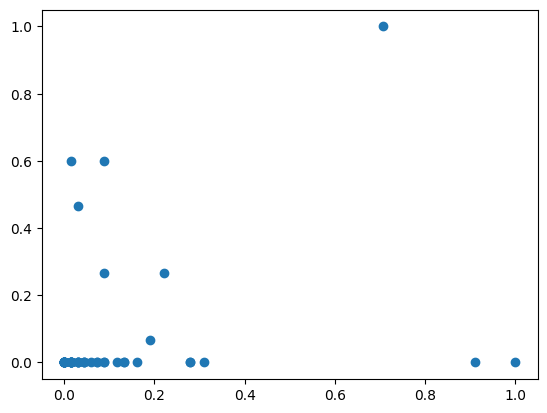

In [16]:
plt.scatter(featured_data['n_obs'],featured_data['n_idents'])

## Choosing the optimal number of clusters

In [17]:
def determine_k_clusters(df, feature_columns, plot=True):
    """
    Determines the optimal number of clusters using the Elbow Method.

    Parameters:
    df (pd.DataFrame): The input dataframe containing the data to be clustered.
    feature_columns (list): A list of column names to be used as features for clustering.
    plot (bool): Whether to plot the Elbow Method graph. Default is True.

    Returns:
    list: A list of SSE values for each number of clusters in k_range.
    int: The optimal number of clusters.
    """
    k_range = range(1, 11)
    sse = []

    for k in k_range:
        km = KMeans(n_clusters=k)
        km.fit(df[feature_columns])
        sse.append(km.inertia_)

    # Find the optimal number of clusters using KneeLocator
    kneedle = KneeLocator(k_range, sse, curve="convex", direction="decreasing")
    optimal_k = kneedle.elbow

    # Print the optimal number of clusters
    print(f"The optimal number of clusters is {optimal_k}")

    # Plot the SSE against k values and mark the optimal number of clusters
    if plot:
        plt.figure(figsize=(5, 4))
        plt.xlabel('Number of clusters (k)')
        plt.ylabel('Sum of squared error (SSE)')
        plt.plot(k_range, sse, marker='o', label='SSE')
        plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
        #plt.text(optimal_k, max(sse)/2, f'Optimal k={optimal_k}', color='red')
        plt.title(f'Optimal number of K - {year}', fontsize=12)
        plt.xticks(k_range)
        plt.grid(True)
        plt.legend()
        plt.show()

    return sse, optimal_k

In [18]:
def process_dataframe(df, year):
    # Selected data
    df_data = selectfeature(df)
    print(f"Processed DataFrame for year {year}:")
    print(df_data.head())

    # Determine optimal number of clusters
    sse, optimal_k = determine_k_clusters(df_data, feature_columns=['n_obs', 'n_idents'])
    
    return df_data, sse, optimal_k

Processed DataFrame for year 2016:
    user_id     n_obs  n_idents
15     2671  0.029412  0.000000
11    18823  0.191176  0.066667
10    19252  0.000000  0.000000
14    39703  0.073529  0.000000
3     71425  0.014706  0.000000
The optimal number of clusters is 4


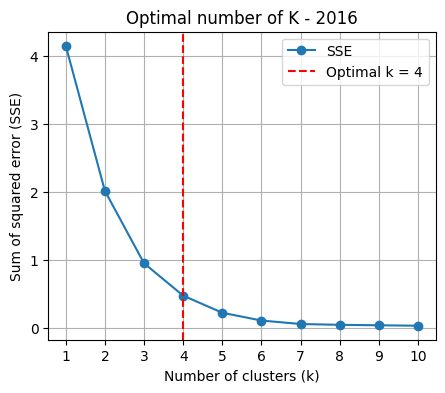

SSE for year 2016: [4.154123518926287, 2.015653058734806, 0.9491359043617447, 0.4725383617499287, 0.22073350908991043, 0.10598761007671038, 0.0551111469193598, 0.04293490060384014, 0.03626794181724975, 0.029783744652545113], Optimal k: 4
Processed DataFrame for year 2017:
    user_id     n_obs  n_idents
45     2671  0.000000  0.048780
26     4425  0.093156  0.000000
37     6184  0.001901  0.024390
83     9414  0.000000  0.585366
13    14399  0.034221  0.000000
The optimal number of clusters is 4


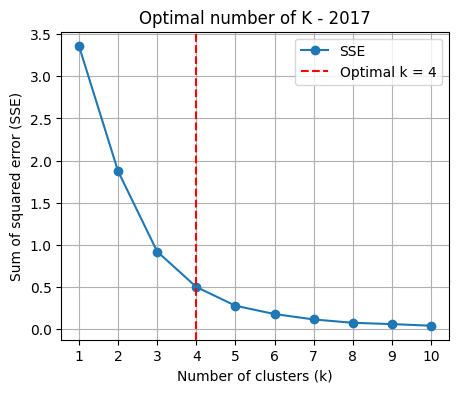

SSE for year 2017: [3.363490571967173, 1.874336474329431, 0.9189471018974769, 0.4983166545595799, 0.2752050370869097, 0.17641680033011942, 0.11248239620081613, 0.07255263420031288, 0.057269982103440795, 0.03791555795457874], Optimal k: 4
Processed DataFrame for year 2018:
     user_id     n_obs  n_idents
41      2671  0.042553  0.147727
29      4425  1.000000  0.045455
25      6184  0.000000  0.000000
15      9414  0.014184  1.000000
150    17378  0.312057  0.068182
The optimal number of clusters is 3


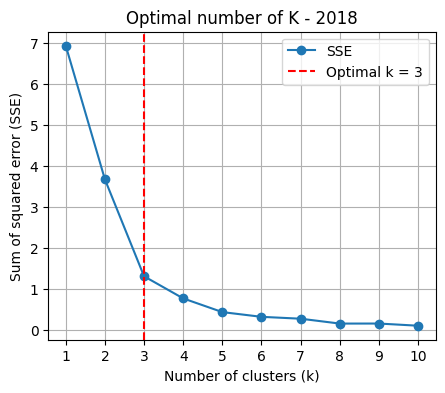

SSE for year 2018: [6.929879389383827, 3.6713877090243807, 1.3078344929944887, 0.7686114798868113, 0.4346841150363157, 0.3194376755461049, 0.2735982935329187, 0.15483506282718412, 0.15574836614672663, 0.10253186738814124], Optimal k: 3
Processed DataFrame for year 2019:
      user_id     n_obs  n_idents
1985     2671  0.000000  0.014878
1992    13493  0.275281  0.000323
1905    14249  0.123596  0.000000
1515    18431  0.008026  0.000000
322     19082  0.036918  0.364761
The optimal number of clusters is 3


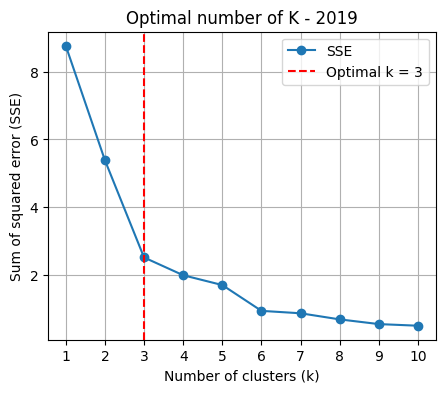

SSE for year 2019: [8.7703524319246, 5.386029085184095, 2.5108675080605836, 1.9858564796039244, 1.6951235782961689, 0.9326211820695779, 0.8607560417760393, 0.6801176546176471, 0.541317001508231, 0.49317051912511783], Optimal k: 3
Processed DataFrame for year 2020:
     user_id     n_obs  n_idents
500     9414  0.000000  0.029935
96     19384  0.018665  0.000000
65     30362  0.033022  0.000000
203   380304  0.002872  0.007484
142   503155  0.004307  0.071094
The optimal number of clusters is 3


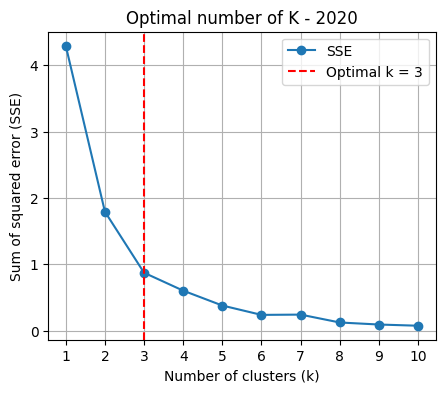

SSE for year 2020: [4.294245522941037, 1.7921142699218655, 0.8715320687721145, 0.6013719857020139, 0.37700884223329917, 0.23592069706142724, 0.24017587808539007, 0.12133279977293598, 0.09063636550084309, 0.07258077668206263], Optimal k: 3
Processed DataFrame for year 2021:
     user_id     n_obs  n_idents
246     2671  0.006329  0.069374
135    19384  0.020042  0.000000
367   422245  0.003165  0.000000
5     503155  0.002110  0.000000
39    505345  0.012658  0.000000
The optimal number of clusters is 3


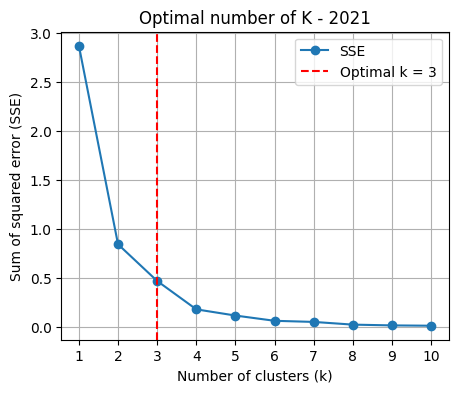

SSE for year 2021: [2.8683456455850678, 0.8447871937142336, 0.4709721136722047, 0.18187758591554337, 0.1187064613313659, 0.0652579666667597, 0.053881663344669394, 0.026302807100295908, 0.018368570718399115, 0.015123036879279617], Optimal k: 3
Processed DataFrame for year 2022:
      user_id     n_obs  n_idents
5697     2671  0.001757  0.056743
5496     4425  0.015924  0.000567
5681    14249  0.000000  0.000000
106     19384  0.026137  0.003783
5403    21466  0.000329  0.000000
The optimal number of clusters is 4


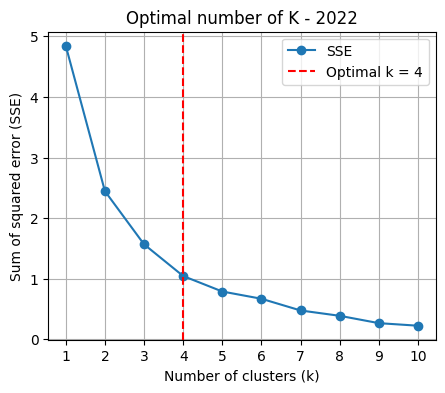

SSE for year 2022: [4.845416658088833, 2.4455482133128634, 1.5680149832550736, 1.0445259359436654, 0.788925673306509, 0.6693066520528269, 0.4761276707497288, 0.3880113501109817, 0.26691414711708283, 0.22458163790364413], Optimal k: 4
Processed DataFrame for year 2023:
      user_id     n_obs  n_idents
4172     4393  0.029345  0.000000
4124     5245  0.049288  0.000236
74       9414  0.008547  0.025683
4004    11986  0.000285  0.007069
4069    12525  0.000000  0.000000
The optimal number of clusters is 3


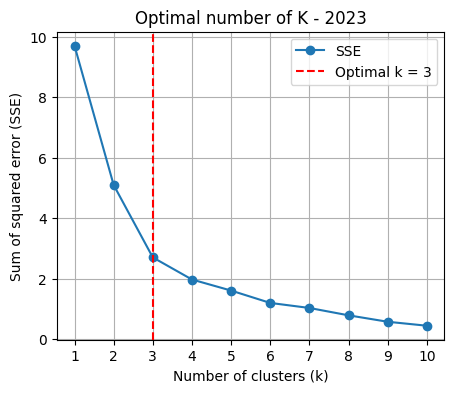

SSE for year 2023: [9.698226967277648, 5.093895578514994, 2.700166840622061, 1.9695422313311015, 1.6038250472984634, 1.1953790935605941, 1.0288030672824733, 0.7858700671253349, 0.5728824028050479, 0.44176983331245584], Optimal k: 3


In [19]:
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


# Call the function for all DataFrames
for df, year in zip(df_list, years):
    #rocess the DataFrame , see, and optimal number of cluster
    df_processed,sse, optimal_k = process_dataframe(df, year)
    print(f"SSE for year {year}: {sse}, Optimal k: {optimal_k}")

## Combine dataframe as one from year 2016- 2023

Processed DataFrame for year combined:
      user_id     n_obs  n_idents
41       2671  0.000659  0.001051
1985     2671  0.000000  0.014878
15       2671  0.000220  0.000000
246      2671  0.000659  0.003315
5697     2671  0.001757  0.024258
The optimal number of clusters is 4


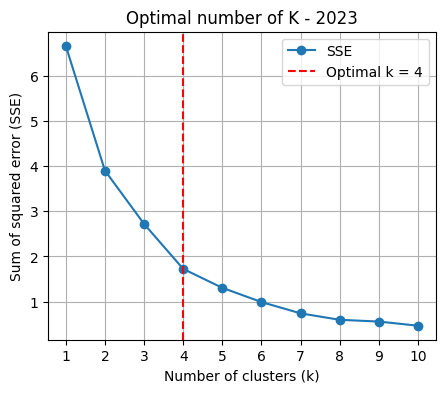

SSE for combined data: [6.666842850346869, 3.9025184165658056, 2.7208224551219904, 1.7243365484195345, 1.3050856796994876, 0.9904906946222215, 0.7395736326755447, 0.59734346919426, 0.5581376353470473, 0.4661037586192759], Optimal k: 4


In [20]:
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]

# merge all DataFrames
combined_df = pd.concat(df_list)

# Verify the combined DataFrame
#print("Combined DataFrame:")
#print(combined_df)

# Call the function on the combined DataFrame
df_combined_processed, sse_combined, optimal_k_combined = process_dataframe(combined_df, "combined")

print(f"SSE for combined data: {sse_combined}, Optimal k: {optimal_k_combined}")

In [21]:
# merge all DataFrames
combined_df = pd.concat(df_list)
combined_df

,user_id,n_obs,n_idents,day_type,year,time_observed_at
0,172457,7,0,Weekday,2016,2016-03-04 14:45:00+00:00
1,310353,1,0,Weekday,2016,2016-03-04 14:45:00+00:00
2,166896,1,0,Weekday,2016,2016-03-04 14:45:00+00:00
3,71425,2,0,Weekday,2016,2016-03-04 14:45:00+00:00
4,511361,12,0,Weekday,2016,2016-03-04 14:45:00+00:00
...,...,...,...,...,...,...
4334,7980682,1,0,Weekday,2023,2023-12-06 19:12:00+00:00
4335,8057587,2,0,Weekday,2023,2023-12-06 19:12:00+00:00
4336,8074982,4,0,Weekday,2023,2023-12-06 19:12:00+00:00
4337,8159894,5,0,Weekday,2023,2023-12-06 19:12:00+00:00



# Training the k-Means Clustering Model
##  Optimum Number of Clusters = 3

### Perform K-means with optimal number of clusters 3 without log transfer

In [95]:
def selectfeature(df):
    # Select variables for plotting
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Don't include the user_id column in the transformation
    col_names = ['n_obs', 'n_idents']
    features = df_std[col_names]
    scaler = MinMaxScaler().fit(features)
    features = scaler.transform(features)

    # Assign the result to those two columns
    df_std[col_names] = features
    df_std.sort_values('user_id', inplace=True)
    
    return df_std, scaler

def reorder_labels(df, kmeans):
    # Get the indices to sort the centroids by `n_obs` and `n_idents`
    centroids = kmeans.cluster_centers_
    sorted_indices = np.argsort(centroids[:, 0])  # Sort by `n_obs`
    
    # Create a mapping from old labels to new labels
    new_labels = np.zeros_like(kmeans.labels_)
    for old_label, new_label in enumerate(sorted_indices):
        new_labels[kmeans.labels_ == old_label] = new_label
    
    df['cluster'] = new_labels
    return df, centroids[sorted_indices]

def perform_kmeans_clustering(df, year):
    # Define color palette
    palette = ['orange', 'green', 'red']   # Low Activity -> Moderate Activity -> High Activity
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df[['n_obs', 'n_idents']])
    df['cluster'] = kmeans.labels_
    
    # Reorder labels -  Low Activity, Moderate Activity, and High Activity to be consistent
    df, ordered_centroids = reorder_labels(df, kmeans)

    # Assign labels based on the reordered clusters
    cluster_mapping = {0: 'Low Activity', 1: 'Moderate Activity', 2: 'High Activity'}
    df['activity_level'] = df['cluster'].map(cluster_mapping)

    # Get the centroid values
    centroids = kmeans.cluster_centers_

    # get the sum of the squared error (SSE or WCSS)
    sse = kmeans.inertia_

    # Create a dataframe from centroids for easier processing
    centroids_df = pd.DataFrame(centroids, columns=['n_obs', 'n_idents'])

    # Print centroids and SSE
    print("Centroids:\n", centroids_df)
    print(f"Sum of Squared Error (SSE): {sse}")
    
    # Plotting all the clusters and their Centroids
    plt.figure(figsize=(6, 5))
    for i in range(3):
        plt.scatter(df[df['cluster'] == i]['n_obs'], df[df['cluster'] == i]['n_idents'], 
                    s=30, color=palette[i], label=cluster_mapping[i])
        
    # Plot the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=0.6, marker='*', label='Centroids')

    # Set title and labels
    plt.title(f'User Clusters Bolivia- {year}', fontsize=16)
    plt.xlabel('Observation Count')
    plt.ylabel('Identification Count')
    plt.legend()
    plt.show()

    return df, sse


Centroids:
       n_obs  n_idents
0  0.054016   0.04359
1  0.955882   0.00000
2  0.705882   1.00000
Sum of Squared Error (SSE): 1.3073197254014728


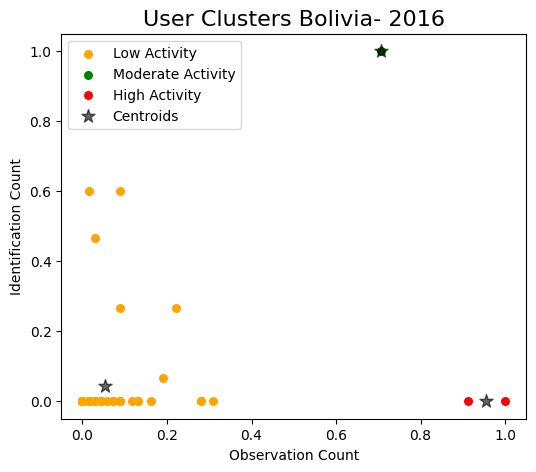

Centroids:
       n_obs  n_idents
0  0.025095  0.011665
1  0.003802  0.634146
2  1.000000  0.000000
Sum of Squared Error (SSE): 0.9189471018974769


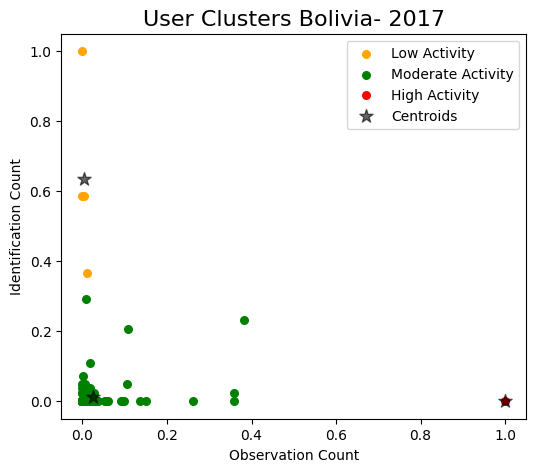

Centroids:
       n_obs  n_idents
0  0.026819  0.005775
1  0.121749  0.744318
2  0.931442  0.018939
Sum of Squared Error (SSE): 1.3078344929944887


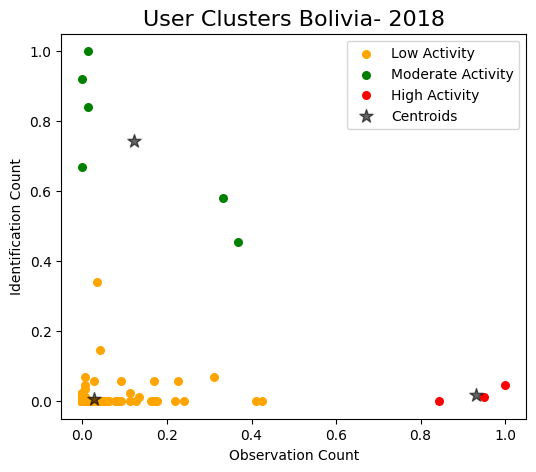

Centroids:
       n_obs  n_idents
0  0.014755  0.000577
1  0.239057  0.023456
2  0.484270  0.676365
Sum of Squared Error (SSE): 2.5108675080605836


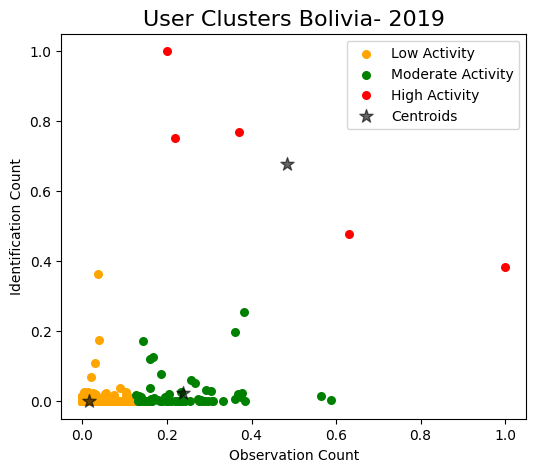

Centroids:
       n_obs  n_idents
0  0.008723  0.002059
1  0.065965  0.460555
2  0.830940  0.314780
Sum of Squared Error (SSE): 0.8715320687721145


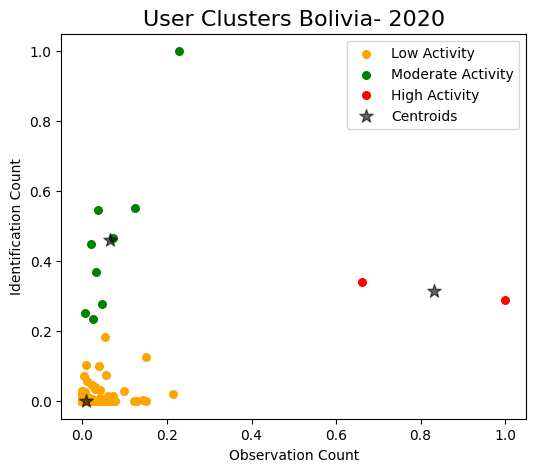

Centroids:
       n_obs  n_idents
0  0.008127  0.002140
1  0.623418  1.000000
2  1.000000  0.221658
Sum of Squared Error (SSE): 0.4709721136722047


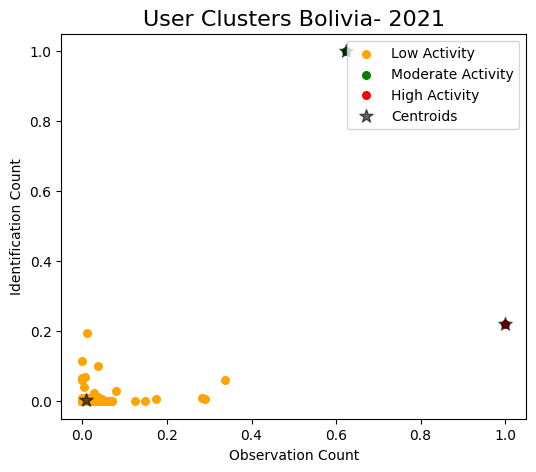

Centroids:
       n_obs  n_idents
0  0.002834  0.000831
1  0.105855  0.426360
2  1.000000  0.020995
Sum of Squared Error (SSE): 1.555871763645666


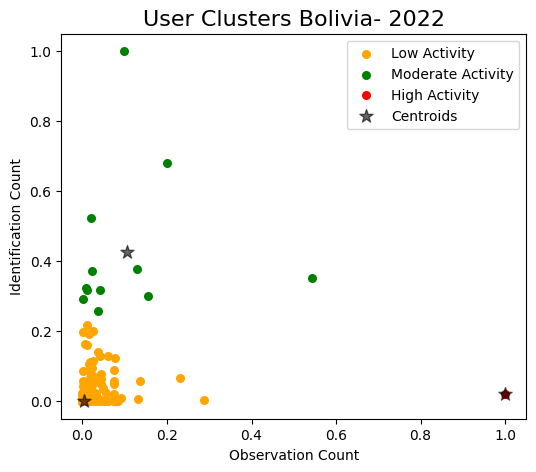

Centroids:
       n_obs  n_idents
0  0.009127  0.001006
1  0.065242  0.688737
2  0.578632  0.139462
Sum of Squared Error (SSE): 2.6832434368926825


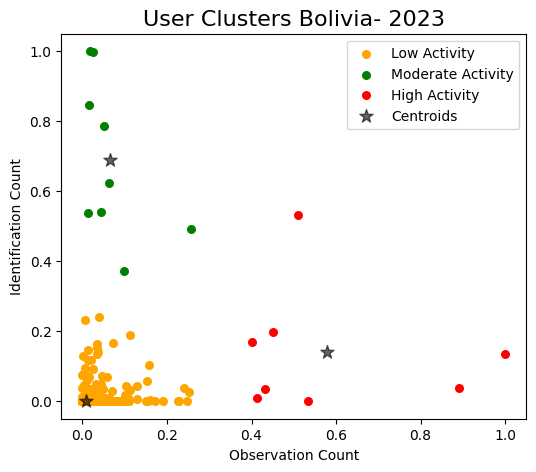

In [96]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = selectfeature(df)
    perform_kmeans_clustering(df_processed, year)

## Perform K-means with optimal number of clusters 3 with log transformation

In [40]:
def log_transform(df):
    # Select variables for plotting
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Add +1 to avoid log(0)
    df_std['n_obs'] = df_std['n_obs'] + 1
    df_std['n_idents'] = df_std['n_idents'] + 1

    # Apply log transformation
    df_std['n_obs'] = np.log(df_std['n_obs'])
    df_std['n_idents'] = np.log(df_std['n_idents'])

    # Scale the log-transformed features
    scaler = MinMaxScaler().fit(df_std[['n_obs', 'n_idents']])
    df_std[['n_obs', 'n_idents']] = scaler.transform(df_std[['n_obs', 'n_idents']])

    # Sort by user_id (optional, for consistency)
    df_std.sort_values('user_id', inplace=True)
    
    return df_std, scaler


def reorder_labels(df, kmeans):
    # Get the indices to sort the centroids by `n_obs` and `n_idents`
    centroids = kmeans.cluster_centers_
    sorted_indices = np.argsort(centroids[:, 0])  # Sort by `n_obs`
    
    # Create a mapping from old labels to new labels
    new_labels = np.zeros_like(kmeans.labels_)
    for old_label, new_label in enumerate(sorted_indices):
        new_labels[kmeans.labels_ == old_label] = new_label
    
    df['cluster'] = new_labels
    return df, centroids[sorted_indices]

def perform_kmeans_clustering(df, year):
    # Define color palette
    palette = ['orange', 'green', 'red']   # Low Activity -> Moderate Activity -> High Activity
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df[['n_obs', 'n_idents']])
    df['cluster'] = kmeans.labels_
    
    # Reorder labels -  Low Activity, Moderate Activity, and High Activity to be consistent
    df, ordered_centroids = reorder_labels(df, kmeans)

    # Assign labels based on the reordered clusters
    cluster_mapping = {0: 'Low Activity', 1: 'Moderate Activity', 2: 'High Activity'}
    df['activity_level'] = df['cluster'].map(cluster_mapping)

    # Get the centroid values
    centroids = kmeans.cluster_centers_

    # get the sum of the squared error (SSE or WCSS)
    sse = kmeans.inertia_

    # Create a dataframe from centroids for easier processing
    centroids_df = pd.DataFrame(centroids, columns=['n_obs', 'n_idents'])

    # Print centroids and SSE
    print("Centroids:\n", centroids_df)
    print(f"Sum of Squared Error (SSE): {sse}")
    
    # Plotting all the clusters and their Centroids
    plt.figure(figsize=(6, 5))
    for i in range(3):
        plt.scatter(df[df['cluster'] == i]['n_obs'], df[df['cluster'] == i]['n_idents'], 
                    s=10, color=palette[i], label=cluster_mapping[i])
        
    # Plot the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=0.6, marker='*', label='Centroids')

    # Set title and labels
    plt.title(f'User Clusters Bolivia - {year}', fontsize=16)
    plt.xlabel('Observation Count')
    plt.ylabel('Identification Count')
    plt.legend()
    plt.show()

    return df, sse


Centroids:
       n_obs      n_idents
0  0.082526  5.551115e-17
1  0.432688  7.619880e-01
2  0.569563  1.785714e-02
Sum of Squared Error (SSE): 1.5001136192187858


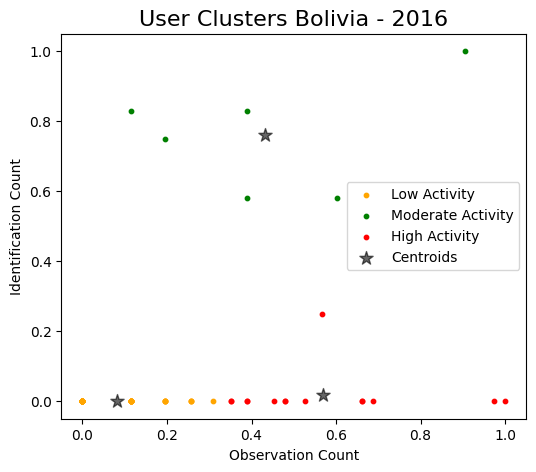

Centroids:
       n_obs  n_idents
0  0.084958  0.033016
1  0.267954  0.728948
2  0.568681  0.043073
Sum of Squared Error (SSE): 3.3453737123653506


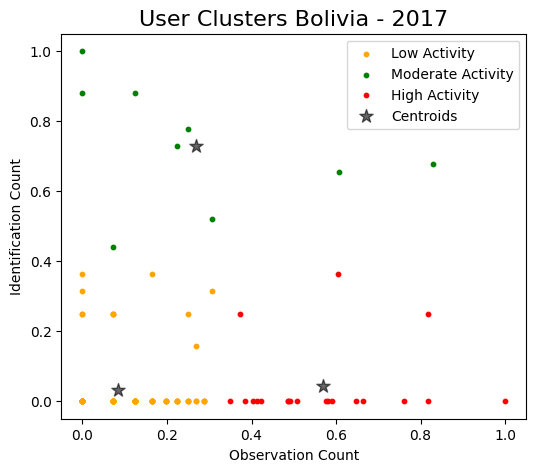

Centroids:
       n_obs  n_idents
0  0.037492  0.012859
1  0.447395  0.014195
2  0.419112  0.649245
Sum of Squared Error (SSE): 4.843502187731167


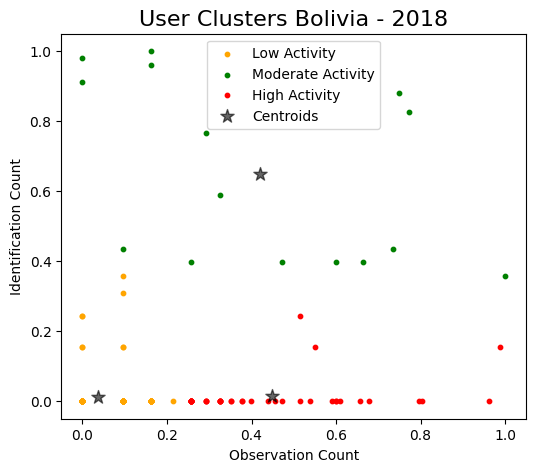

Centroids:
       n_obs  n_idents
0  0.410711  0.009431
1  0.082937  0.005246
2  0.655985  0.530721
Sum of Squared Error (SSE): 28.89455758027235


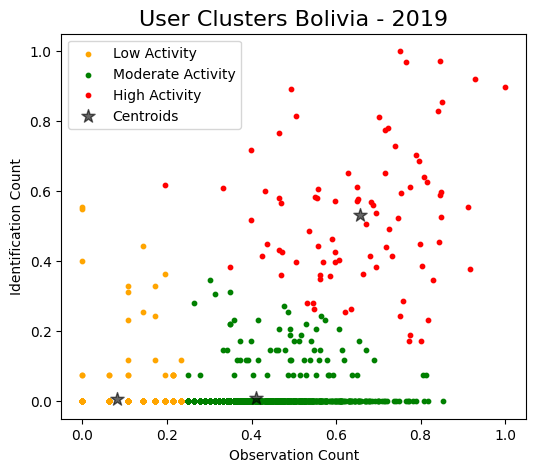

Centroids:
       n_obs  n_idents
0  0.374243  0.027338
1  0.058938  0.007312
2  0.538334  0.666193
Sum of Squared Error (SSE): 7.999784803081207


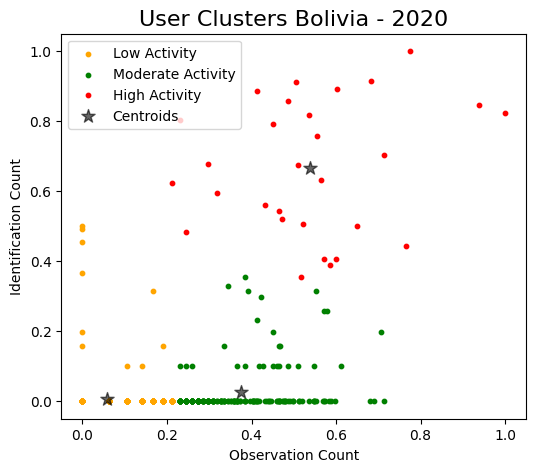

Centroids:
       n_obs  n_idents
0  0.210741  0.009343
1  0.523006  0.220469
2  0.014399  0.013906
Sum of Squared Error (SSE): 7.109346621605437


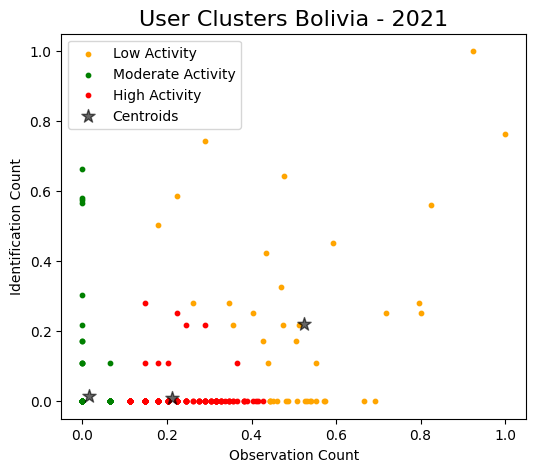

Centroids:
       n_obs  n_idents
0  0.065141  0.001745
1  0.313596  0.002593
2  0.511728  0.569355
Sum of Squared Error (SSE): 38.98515715001306


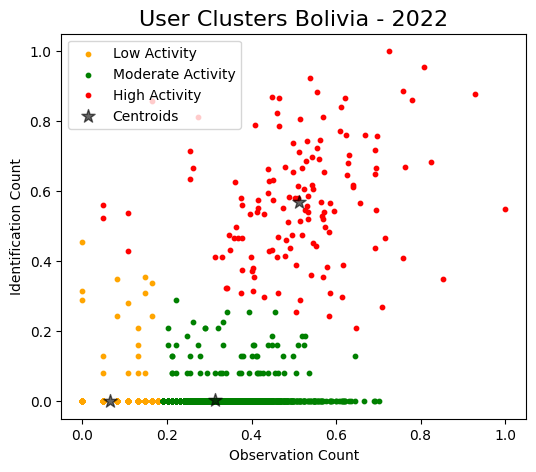

Centroids:
       n_obs  n_idents
0  0.091190  0.003785
1  0.392458  0.003081
2  0.523583  0.576759
Sum of Squared Error (SSE): 44.417028681181726


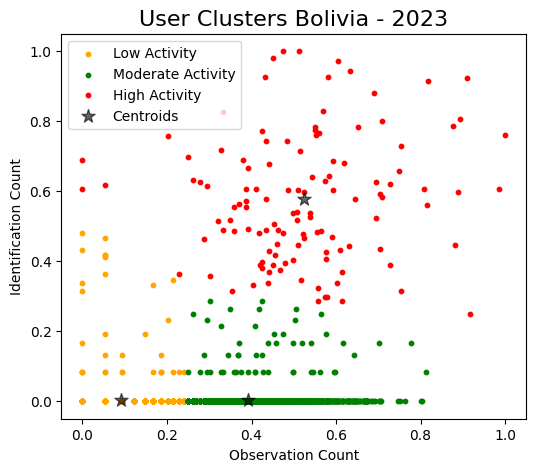

In [41]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = log_transform(df)
    perform_kmeans_clustering(df_processed, year)

Centroids:
       n_obs  n_idents
0  0.326330  0.004508
1  0.066107  0.004004
2  0.473034  0.512383
Sum of Squared Error (SSE): 106.78567798198726


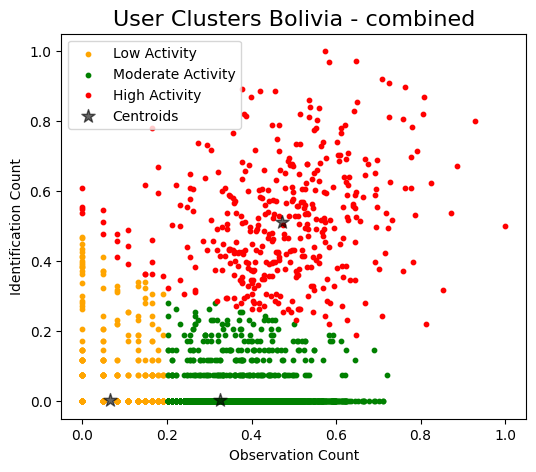

(      user_id     n_obs  n_idents  cluster activity_level
 41       2671  0.164570  0.280069        0   Low Activity
 1985     2671  0.000000  0.554009        2  High Activity
 15       2671  0.082285  0.000000        0   Low Activity
 246      2671  0.164570  0.396659        2  High Activity
 5697     2671  0.260837  0.605666        2  High Activity
 ...       ...       ...       ...      ...            ...
 586   8085024  0.000000  0.000000        0   Low Activity
 4324  8085024  0.000000  0.000000        0   Low Activity
 4326  8085291  0.000000  0.000000        0   Low Activity
 4331  8092781  0.000000  0.000000        0   Low Activity
 4337  8159894  0.130418  0.000000        0   Low Activity
 
 [13586 rows x 5 columns],
 106.78567798198726)

In [42]:
# Concatenate all the DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
combined_df = pd.concat(df_list)

# Process the combined DataFrame
df_combined_processed, scaler_combined = log_transform(combined_df)

# Perform clustering with 3 clusters on combined data
perform_kmeans_clustering(df_combined_processed, "combined")

Centroids:
       n_obs  n_idents
0  0.054016   0.04359
1  0.955882   0.00000
2  0.705882   1.00000
Sum of Squared Error (SSE): 1.3073197254014728


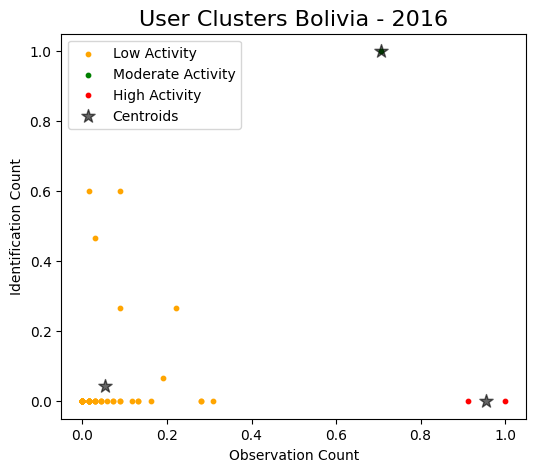

Year: 2016
(    user_id     n_obs  n_idents  cluster     activity_level
15     2671  0.029412  0.000000        0       Low Activity
11    18823  0.191176  0.066667        0       Low Activity
10    19252  0.000000  0.000000        0       Low Activity
14    39703  0.073529  0.000000        0       Low Activity
3     71425  0.014706  0.000000        0       Low Activity
2    166896  0.000000  0.000000        0       Low Activity
0    172457  0.088235  0.000000        0       Low Activity
1    310353  0.000000  0.000000        0       Low Activity
25   443108  0.705882  1.000000        1  Moderate Activity
17   503155  0.000000  0.000000        0       Low Activity
4    511361  0.161765  0.000000        0       Low Activity
5    560606  0.000000  0.000000        0       Low Activity
7    611150  0.000000  0.000000        0       Low Activity
9    649178  0.088235  0.000000        0       Low Activity
6    669943  0.117647  0.000000        0       Low Activity
37   688093  0.132353  0.000

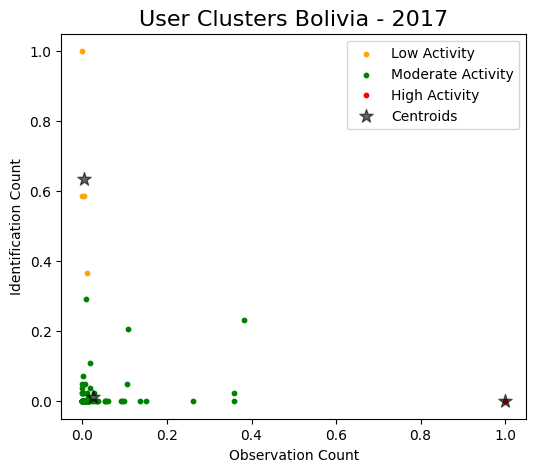

Year: 2017
(     user_id     n_obs  n_idents  cluster     activity_level
45      2671  0.000000  0.048780        1  Moderate Activity
26      4425  0.093156  0.000000        1  Moderate Activity
37      6184  0.001901  0.024390        1  Moderate Activity
83      9414  0.000000  0.585366        0       Low Activity
13     14399  0.034221  0.000000        1  Moderate Activity
..       ...       ...       ...      ...                ...
110  6270029  0.000000  0.000000        1  Moderate Activity
113  6823939  0.001901  0.000000        1  Moderate Activity
117  7878339  0.000000  0.000000        1  Moderate Activity
118  8054583  0.000000  0.000000        1  Moderate Activity
119  8082337  0.000000  0.000000        1  Moderate Activity

[120 rows x 5 columns], 0.9189471018974769)
Centroids:
       n_obs  n_idents
0  0.026819  0.005775
1  0.121749  0.744318
2  0.931442  0.018939
Sum of Squared Error (SSE): 1.3078344929944887


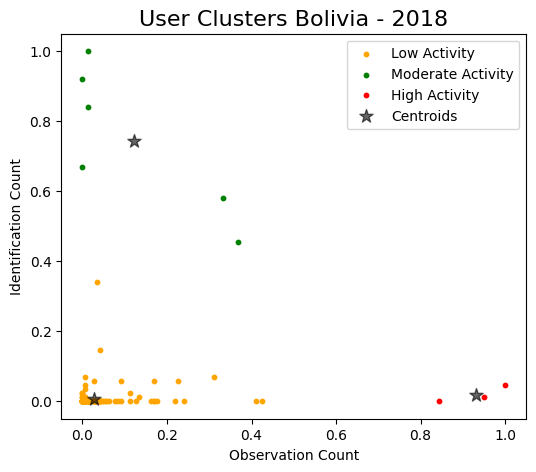

Year: 2018
(     user_id     n_obs  n_idents  cluster     activity_level
41      2671  0.042553  0.147727        0       Low Activity
29      4425  1.000000  0.045455        2      High Activity
25      6184  0.000000  0.000000        0       Low Activity
15      9414  0.014184  1.000000        1  Moderate Activity
150    17378  0.312057  0.068182        0       Low Activity
..       ...       ...       ...      ...                ...
186  8043797  0.000000  0.000000        0       Low Activity
190  8052903  0.007092  0.000000        0       Low Activity
189  8055223  0.000000  0.000000        0       Low Activity
187  8077905  0.000000  0.000000        0       Low Activity
188  8079884  0.000000  0.000000        0       Low Activity

[192 rows x 5 columns], 1.3078344929944887)
Centroids:
       n_obs  n_idents
0  0.014755  0.000577
1  0.239057  0.023456
2  0.484270  0.676365
Sum of Squared Error (SSE): 2.5108675080605836


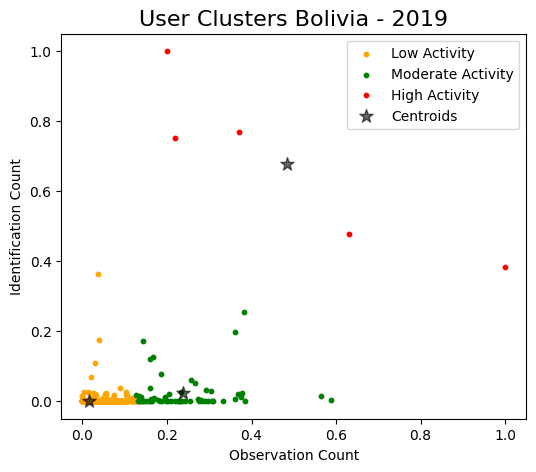

Year: 2019
(      user_id     n_obs  n_idents  cluster     activity_level
1985     2671  0.000000  0.014878        0       Low Activity
1992    13493  0.275281  0.000323        1  Moderate Activity
1905    14249  0.123596  0.000000        0       Low Activity
1515    18431  0.008026  0.000000        0       Low Activity
322     19082  0.036918  0.364761        0       Low Activity
...       ...       ...       ...      ...                ...
2100  7665991  0.000803  0.000000        0       Low Activity
2111  7818967  0.000000  0.000000        0       Low Activity
2104  8026463  0.000000  0.000000        0       Low Activity
2105  8056185  0.000000  0.000000        0       Low Activity
2107  8077905  0.000803  0.000000        0       Low Activity

[2114 rows x 5 columns], 2.5108675080605836)
Centroids:
       n_obs  n_idents
0  0.008723  0.002059
1  0.065965  0.460555
2  0.830940  0.314780
Sum of Squared Error (SSE): 0.8715320687721145


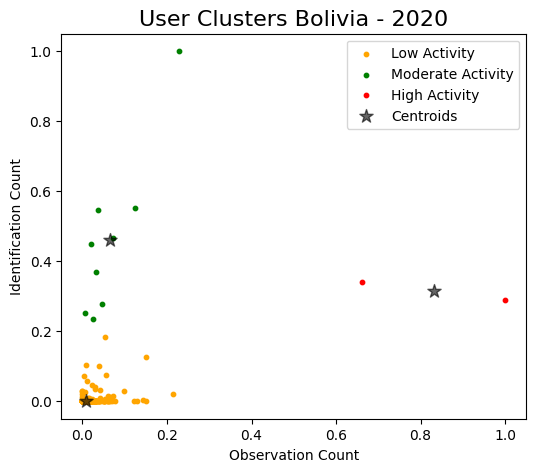

Year: 2020
(     user_id     n_obs  n_idents  cluster activity_level
500     9414  0.000000  0.029935        0   Low Activity
96     19384  0.018665  0.000000        0   Low Activity
65     30362  0.033022  0.000000        0   Low Activity
203   380304  0.002872  0.007484        0   Low Activity
142   503155  0.004307  0.071094        0   Low Activity
..       ...       ...       ...      ...            ...
580  8056185  0.000000  0.000000        0   Low Activity
578  8061737  0.000000  0.000000        0   Low Activity
584  8077905  0.000000  0.000000        0   Low Activity
583  8078467  0.000000  0.000000        0   Low Activity
586  8085024  0.000000  0.000000        0   Low Activity

[587 rows x 5 columns], 0.8715320687721145)
Centroids:
       n_obs  n_idents
0  0.008127  0.002140
1  0.623418  1.000000
2  1.000000  0.221658
Sum of Squared Error (SSE): 0.4709721136722047


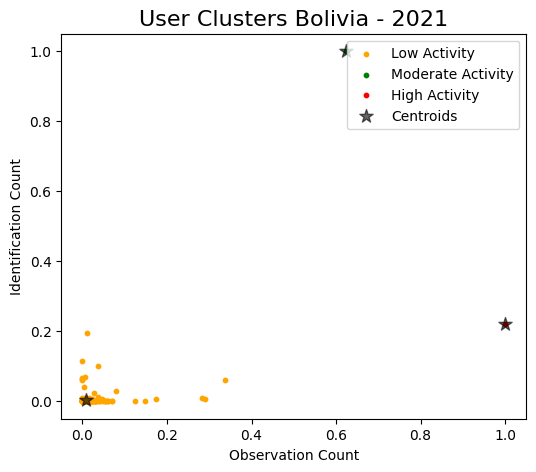

Year: 2021
(     user_id     n_obs  n_idents  cluster activity_level
246     2671  0.006329  0.069374        0   Low Activity
135    19384  0.020042  0.000000        0   Low Activity
367   422245  0.003165  0.000000        0   Low Activity
5     503155  0.002110  0.000000        0   Low Activity
39    505345  0.012658  0.000000        0   Low Activity
..       ...       ...       ...      ...            ...
446  8065521  0.000000  0.000000        0   Low Activity
453  8074982  0.002110  0.000000        0   Low Activity
449  8081337  0.000000  0.000000        0   Low Activity
450  8081862  0.001055  0.000000        0   Low Activity
451  8082914  0.000000  0.000000        0   Low Activity

[455 rows x 5 columns], 0.4709721136722047)
Centroids:
       n_obs  n_idents
0  0.002834  0.000831
1  0.105855  0.426360
2  1.000000  0.020995
Sum of Squared Error (SSE): 1.555871763645666


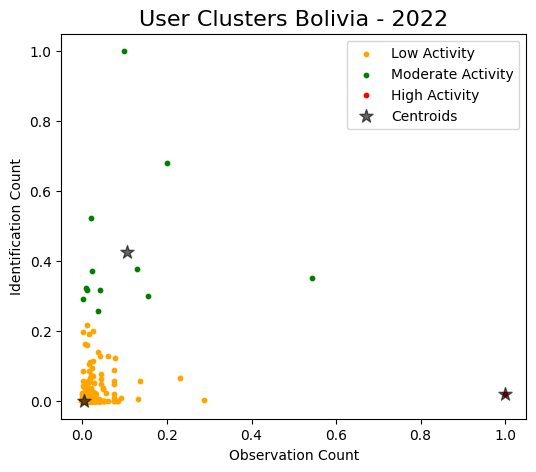

Year: 2022
(      user_id     n_obs  n_idents  cluster activity_level
5697     2671  0.001757  0.056743        0   Low Activity
5496     4425  0.015924  0.000567        0   Low Activity
5681    14249  0.000000  0.000000        0   Low Activity
106     19384  0.026137  0.003783        0   Low Activity
5403    21466  0.000329  0.000000        0   Low Activity
...       ...       ...       ...      ...            ...
5721  8074982  0.000879  0.000000        0   Low Activity
5709  8077905  0.000110  0.000000        0   Low Activity
5716  8081287  0.000000  0.000000        0   Low Activity
5713  8081337  0.000000  0.000000        0   Low Activity
5715  8081862  0.000000  0.000000        0   Low Activity

[5724 rows x 5 columns], 1.555871763645666)
Centroids:
       n_obs  n_idents
0  0.009127  0.001006
1  0.065242  0.688737
2  0.578632  0.139462
Sum of Squared Error (SSE): 2.6832434368926825


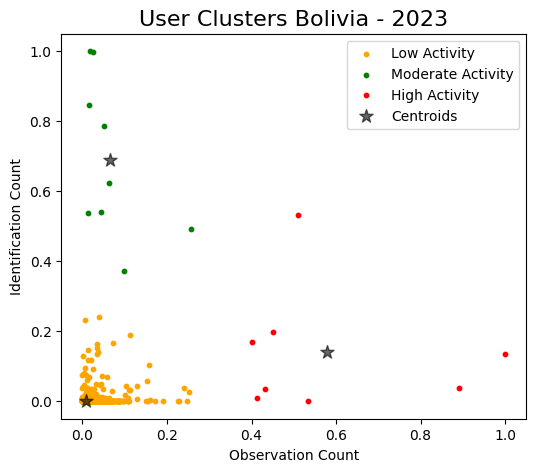

Year: 2023
(      user_id     n_obs  n_idents  cluster activity_level
4172     4393  0.029345  0.000000        0   Low Activity
4124     5245  0.049288  0.000236        0   Low Activity
74       9414  0.008547  0.025683        0   Low Activity
4004    11986  0.000285  0.007069        0   Low Activity
4069    12525  0.000000  0.000000        0   Low Activity
...       ...       ...       ...      ...            ...
4314  8082754  0.000000  0.000000        0   Low Activity
4324  8085024  0.000000  0.000000        0   Low Activity
4326  8085291  0.000000  0.000000        0   Low Activity
4331  8092781  0.000000  0.000000        0   Low Activity
4337  8159894  0.001140  0.000000        0   Low Activity

[4339 rows x 5 columns], 2.6832434368926825)


In [43]:

df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Create a dictionary to store the processed DataFrames for each year
clustered_dfs = {}

# Process each DataFrame
for df, year in zip(df_list, years):
    df['year'] = year  # Add year information to handle manual reassignment
    df_processed, scaler = selectfeature(df)
    df_clustered = perform_kmeans_clustering(df_processed, year)
    
    # Store the resulting DataFrame in the dictionary
    clustered_dfs[year] = df_clustered

    # Print to verify (optional)
    print(f"Year: {year}")
    print(df_clustered)
    
    df_2016_clustered = clustered_dfs[2016]
    df_2016_clustered

In [44]:
df_2019_clustered = clustered_dfs[2019]
df_2019_clustered

(      user_id     n_obs  n_idents  cluster     activity_level
 1985     2671  0.000000  0.014878        0       Low Activity
 1992    13493  0.275281  0.000323        1  Moderate Activity
 1905    14249  0.123596  0.000000        0       Low Activity
 1515    18431  0.008026  0.000000        0       Low Activity
 322     19082  0.036918  0.364761        0       Low Activity
 ...       ...       ...       ...      ...                ...
 2100  7665991  0.000803  0.000000        0       Low Activity
 2111  7818967  0.000000  0.000000        0       Low Activity
 2104  8026463  0.000000  0.000000        0       Low Activity
 2105  8056185  0.000000  0.000000        0       Low Activity
 2107  8077905  0.000803  0.000000        0       Low Activity
 
 [2114 rows x 5 columns],
 2.5108675080605836)

In [45]:
df_2021_clustered = clustered_dfs[2021]
df_2021_clustered

(     user_id     n_obs  n_idents  cluster activity_level
 246     2671  0.006329  0.069374        0   Low Activity
 135    19384  0.020042  0.000000        0   Low Activity
 367   422245  0.003165  0.000000        0   Low Activity
 5     503155  0.002110  0.000000        0   Low Activity
 39    505345  0.012658  0.000000        0   Low Activity
 ..       ...       ...       ...      ...            ...
 446  8065521  0.000000  0.000000        0   Low Activity
 453  8074982  0.002110  0.000000        0   Low Activity
 449  8081337  0.000000  0.000000        0   Low Activity
 450  8081862  0.001055  0.000000        0   Low Activity
 451  8082914  0.000000  0.000000        0   Low Activity
 
 [455 rows x 5 columns],
 0.4709721136722047)

In [46]:
#

# AgglomerativeClustering

In [47]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering as AggClust
import sys

In [48]:

# Increase the recursion limit if needed 
sys.setrecursionlimit(100)

def selectfeature(df):# without log transformation
    # Select variables for plotting
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Scale the features
    scaler = MinMaxScaler().fit(df_std[['n_obs', 'n_idents']])
    df_std[['n_obs', 'n_idents']] = scaler.transform(df_std[['n_obs', 'n_idents']])

    # Sort by user_id (optional, for consistency)
    df_std.sort_values('user_id', inplace=True)
    
    return df_std, scaler

def reorder_labels(df, labels):
    # Create a DataFrame 
    df_clusters = pd.DataFrame({'cluster': labels, 'n_obs': df['n_obs'], 'n_idents': df['n_idents']})

    # Calculate an aggregate metric (e.g., median) to sort clusters
    sorted_order = df_clusters.groupby('cluster').median().sort_values(by=['n_obs', 'n_idents']).index

    # Map old labels to new labels based on the sorted order
    new_labels = np.zeros_like(labels)
    for new_label, old_label in enumerate(sorted_order):
        new_labels[labels == old_label] = new_label
    
    df['cluster'] = new_labels
    return df

def perform_agglomerative_clustering(df, year):
    # Define color palette
    palette = ['orange', 'green', 'red']   # Low Activity -> Moderate Activity -> High Activity
    
    # Perform Agglomerative Clustering
    agglomerative = AggClust(n_clusters=3, metric='euclidean').fit(df[['n_obs', 'n_idents']])
    df['cluster'] = agglomerative.labels_
    
    # Reorder labels - Low Activity, Moderate Activity, and High Activity to be consistent
    df = reorder_labels(df, agglomerative.labels_)

    # Assign labels based on the reordered clusters
    cluster_mapping = {0: 'Low Activity', 1: 'Moderate Activity', 2: 'High Activity'}
    df['activity_level'] = df['cluster'].map(cluster_mapping)

    return df

def plot_clusters(df, year):
    # Define color palette
    palette = ['orange', 'green', 'red']   # Low Activity -> Moderate Activity -> High Activity
    
    # Plotting all the clusters
    plt.figure(figsize=(6, 5))
    for i in range(3):
        plt.scatter(df[df['cluster'] == i]['n_obs'], df[df['cluster'] == i]['n_idents'], 
                    s=10, color=palette[i], label=df['activity_level'].unique()[i])
        
    # Set title and labels
    plt.title(f'Agglomerative Clustering - Bolivia {year}', fontsize=16)
    plt.xlabel('Observation Count')
    plt.ylabel('Identification Count')
    plt.legend()
    plt.show()
    
def plot_dendrogram(df):
    # Plotting the dendrogram
    plt.figure(figsize=(10, 7))
    Z = linkage(df[['n_obs', 'n_idents']], method='ward')
    dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
    plt.title('Dendrogram')
    plt.xlabel('Data Points')
    plt.ylabel('Euclidean Distances')
    plt.show()


In [49]:
df_std, scaler = selectfeature(df)
df_clustered = perform_agglomerative_clustering(df_std, 2019)

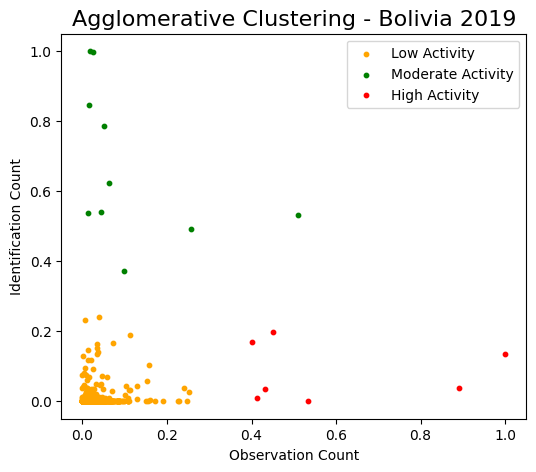

In [50]:
plot_cluster = plot_clusters(df_clustered,2019)

In [54]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = selectfeature(df)
    perform_agglomerative_clustering(df_processed, year)


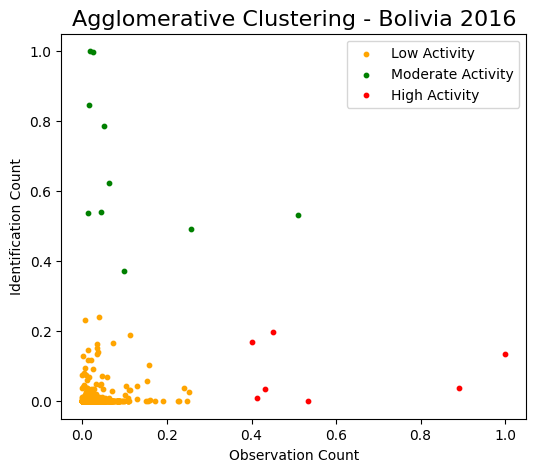

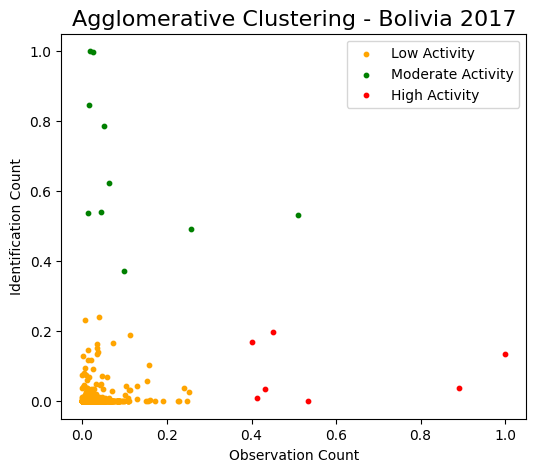

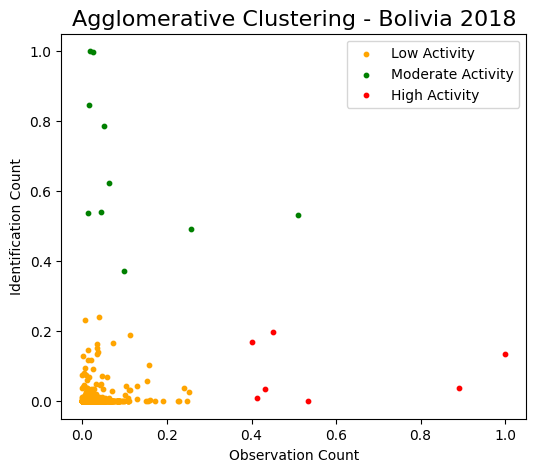

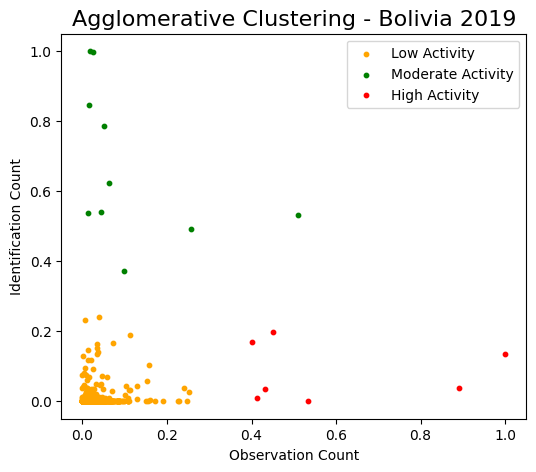

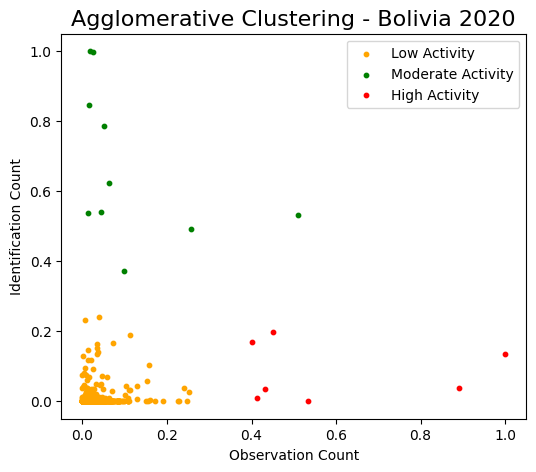

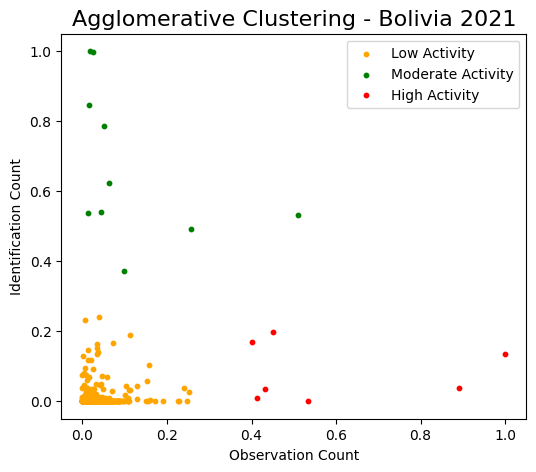

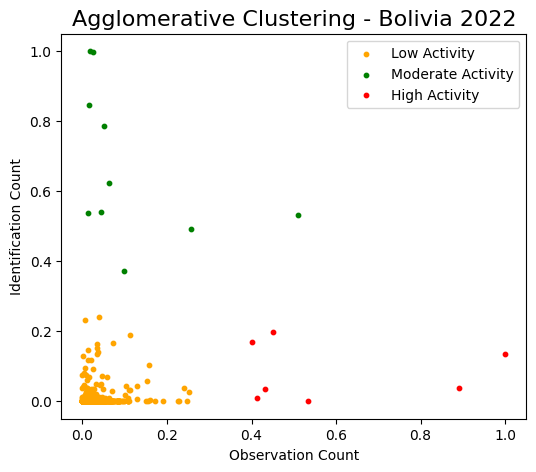

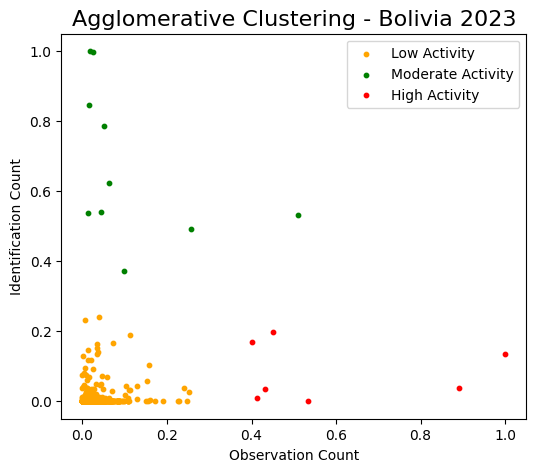

In [58]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = selectfeature(df)
    df_cluster = perform_agglomerative_clustering(df_processed, year)
    plot_clusters(df_clustered,year)
    


In [61]:
## another method to implement 

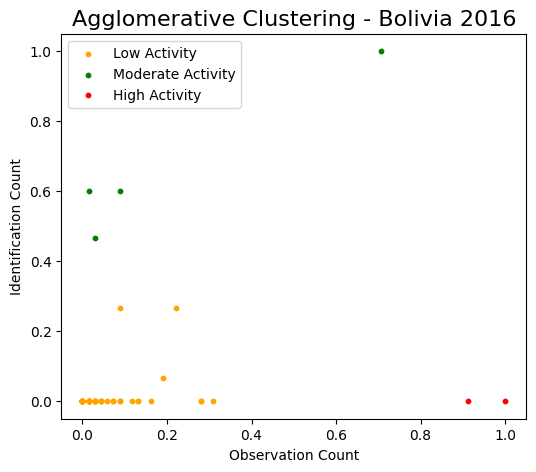

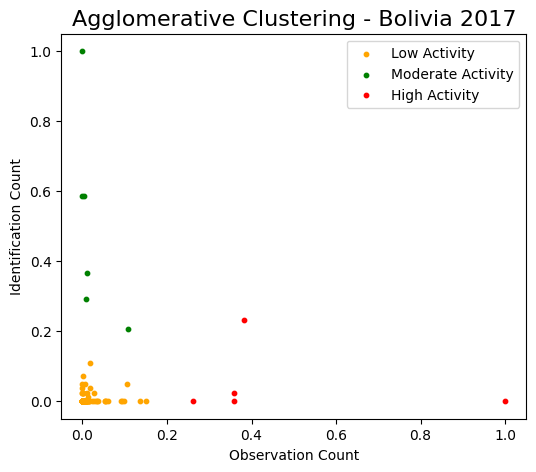

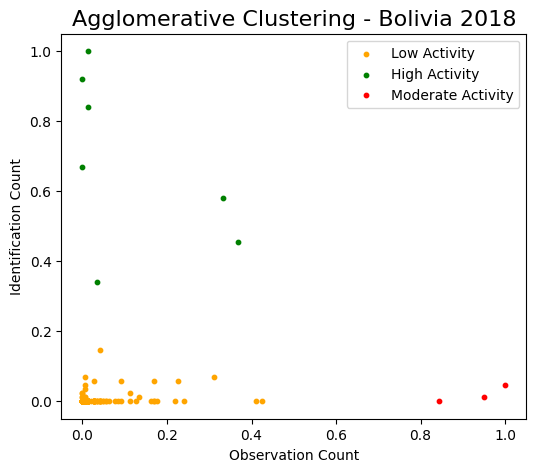

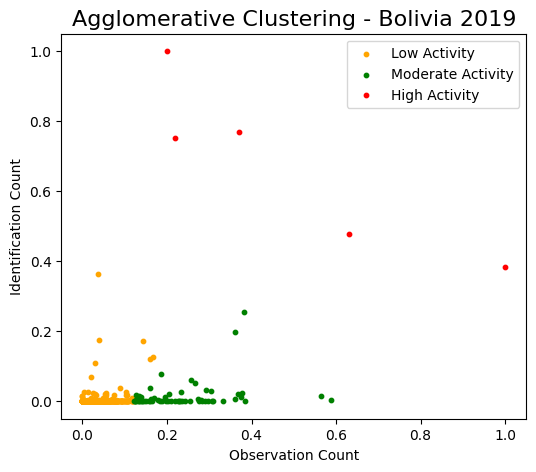

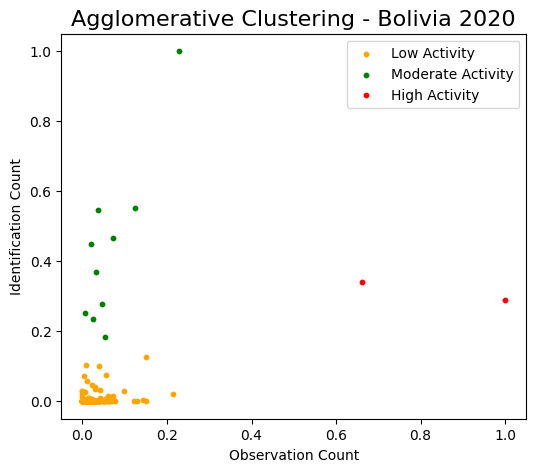

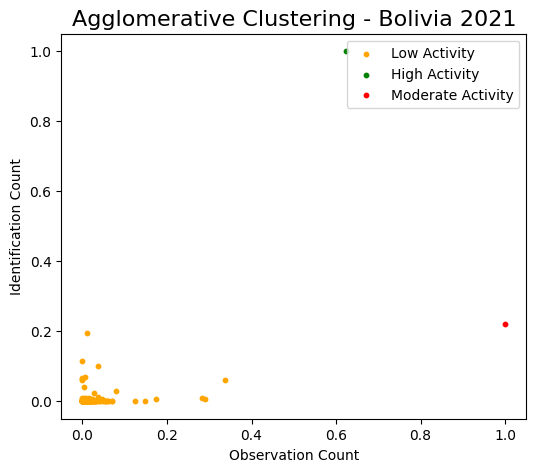

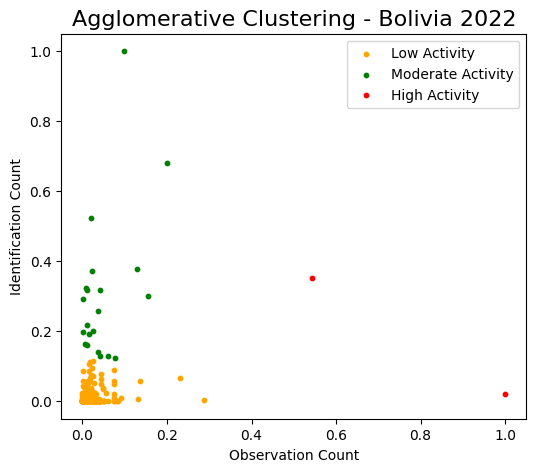

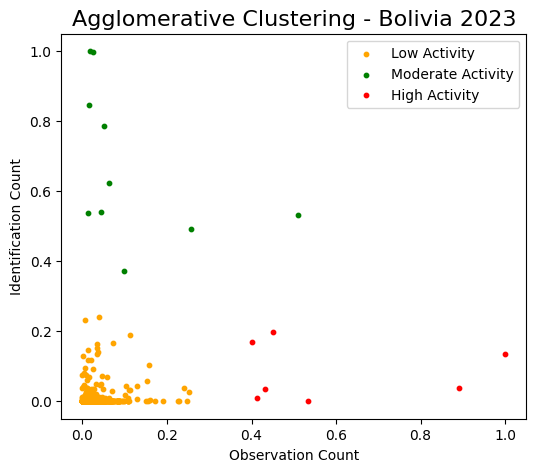

In [59]:
def process_dataframe(df, year):
    df_std, scaler = selectfeature(df)
    df_clustered = perform_agglomerative_clustering(df_std, year)
    plot_clusters(df_clustered, year)
    return df_clustered

df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for df, year in zip(df_list, years):
    processed_df = process_dataframe(df, year)

In [60]:
df_clustered

,user_id,n_obs,n_idents,cluster,activity_level
4172,4393,0.029345,0.000000,0,Low Activity
4124,5245,0.049288,0.000236,0,Low Activity
74,9414,0.008547,0.025683,0,Low Activity
4004,11986,0.000285,0.007069,0,Low Activity
4069,12525,0.000000,0.000000,0,Low Activity
...,...,...,...,...,...
4314,8082754,0.000000,0.000000,0,Low Activity
4324,8085024,0.000000,0.000000,0,Low Activity
4326,8085291,0.000000,0.000000,0,Low Activity
4331,8092781,0.000000,0.000000,0,Low Activity


In [52]:
## Dendrograms 

In [ ]:
def plot_dendrogram(df,year):
    # Plotting the dendrogram
    plt.figure(figsize=(10, 7))
    Z = linkage(df[['n_obs', 'n_idents']], method='ward')
    dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
    plt.title('Dendrogram')
    plt.xlabel('Data Points')
    plt.ylabel('Euclidean Distances')
    plt.show()

In [ ]:
plot_dendrogram(df_std,2019)

In [37]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram

# Non Linear Clustering 
## DBSCAN

In [62]:
from sklearn.cluster import DBSCAN

In [97]:
def selectfeature(df):
    # Select features
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Don't include the user_id column 
    col_names = ['n_obs', 'n_idents']
    features = df_std[col_names]
    scaler = MinMaxScaler().fit(features)
    features = scaler.transform(features)

    # Assign the result to  two columns
    df_std[col_names] = features
    df_std.sort_values('user_id', inplace=True)
    
    return df_std, scaler

def perform_dbscan_clustering(df, year):
    # Define color palette
    palette = ['orange', 'green', 'red']  # 
    
    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=0.2, min_samples=5).fit(df[['n_obs', 'n_idents']])
    df['cluster'] = dbscan.labels_
    
    # Count of unique clusters
    labels = dbscan.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    print(f'Estimated number of clusters: {n_clusters}')
    print(f'Estimated number of noise points: {n_noise}')
    
    # Get unique cluster labels
    unique_labels = set(labels)
    print("Unique labels (clusters):", unique_labels)

    # Plot clusters
    plt.figure(figsize=(6, 5))
    
    # Iterate over unique labels
    for label in unique_labels:
        # Assign color or use black for noise
        if label == -1:
            color = 'black'
            label_name = 'Noise'
        else:
            color = palette[label % len(palette)]
            label_name = f'Cluster {label}'
        
        # Filter data points belonging to the current label
        cluster_data = df[df['cluster'] == label]
        plt.scatter(cluster_data['n_obs'], cluster_data['n_idents'], 
                    s=10, color=color, label=label_name)
    
    # Set title and labels
    plt.title(f'DBScan clustering - Bolivia {year}', fontsize=16)
    plt.xlabel('Observation Count')
    plt.ylabel('Identification Count')
    plt.legend()
    plt.show()

    return df
#test
# df_std, scaler = selectfeature(df)
# df_clustered = perform_dbscan_clustering(df_std, 2023)


Estimated number of clusters: 1
Estimated number of noise points: 8
Unique labels (clusters): {0, -1}


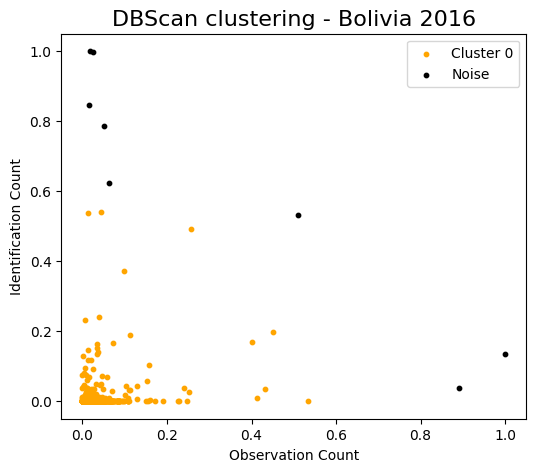

In [98]:
df_std, scaler = selectfeature(df)
df_clustered = perform_dbscan_clustering(df_std, 2016)

Estimated number of clusters: 1
Estimated number of noise points: 8
Unique labels (clusters): {0, -1}


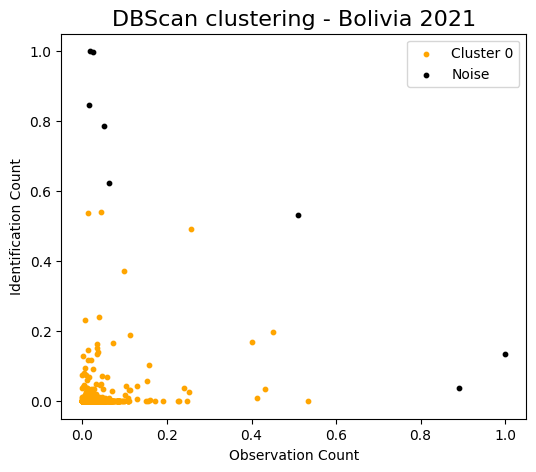

In [99]:
df_std, scaler = selectfeature(df)
df_clustered = perform_dbscan_clustering(df_std, 2021)

Estimated number of clusters: 1
Estimated number of noise points: 8
Unique labels (clusters): {0, -1}


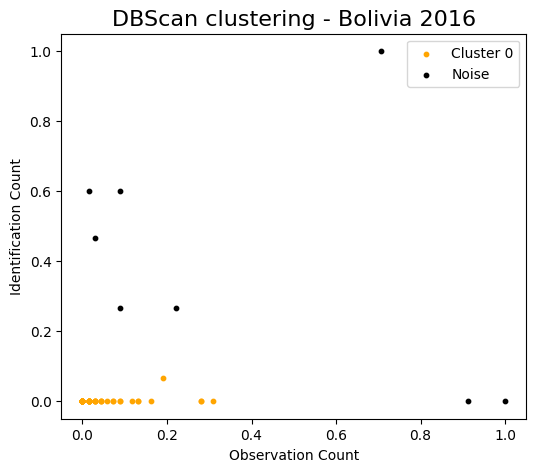

Estimated number of clusters: 1
Estimated number of noise points: 5
Unique labels (clusters): {0, -1}


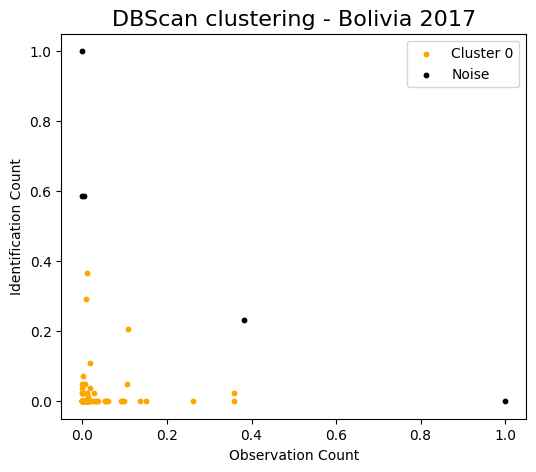

Estimated number of clusters: 1
Estimated number of noise points: 9
Unique labels (clusters): {0, -1}


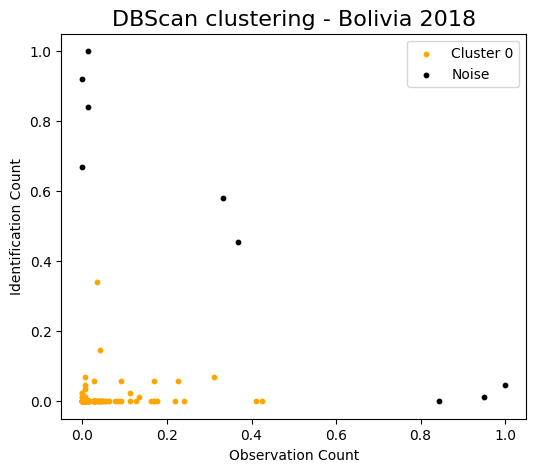

Estimated number of clusters: 1
Estimated number of noise points: 5
Unique labels (clusters): {0, -1}


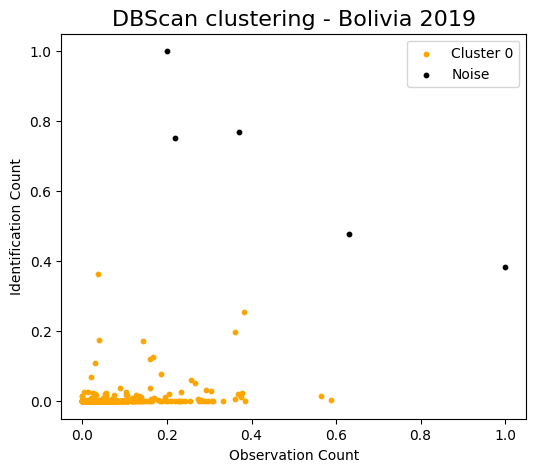

Estimated number of clusters: 1
Estimated number of noise points: 3
Unique labels (clusters): {0, -1}


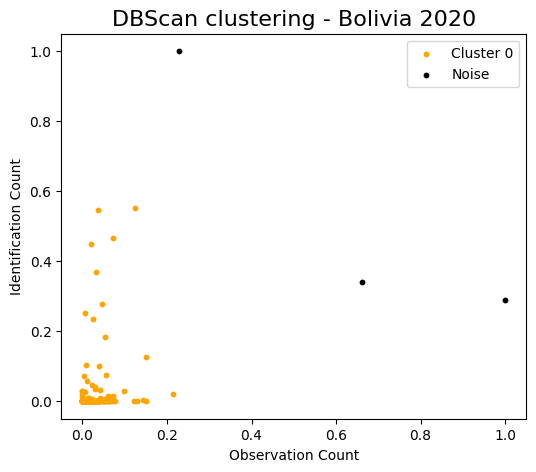

Estimated number of clusters: 1
Estimated number of noise points: 2
Unique labels (clusters): {0, -1}


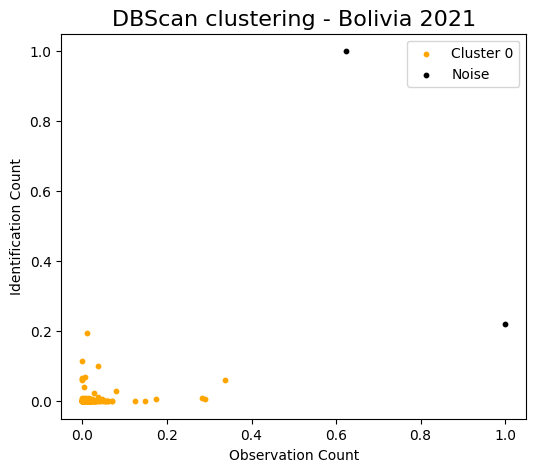

Estimated number of clusters: 1
Estimated number of noise points: 4
Unique labels (clusters): {0, -1}


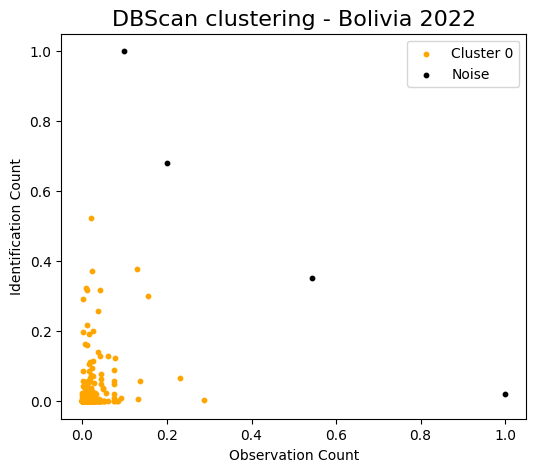

Estimated number of clusters: 1
Estimated number of noise points: 8
Unique labels (clusters): {0, -1}


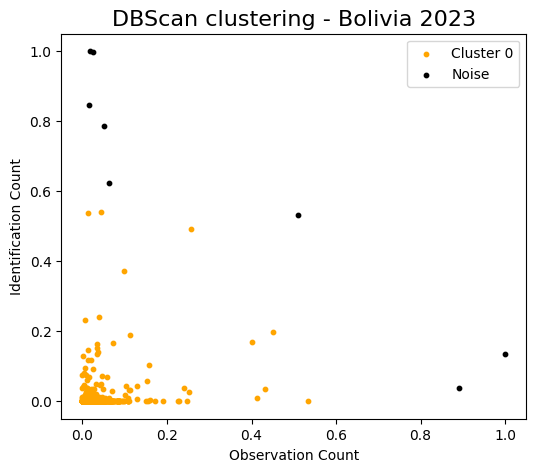

In [100]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = selectfeature(df)
    perform_dbscan_clustering(df_processed, year)

In [ ]:
# merge all  DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
combined_df_dbscan = pd.concat(df_list)

# Process the combined DataFrame
df_combined_processed, scaler_combined = selectfeature(combined_df_dbscan)

# Perform clustering 
perform_dbscan_clustering(df_combined_processed, "combined")

# Gaussian Mixture Model (GMM)

In [67]:
from sklearn.mixture import GaussianMixture

In [68]:
def selectfeature(df):
    # Select variables for plotting
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Don't include the user_id column in the transformation
    col_names = ['n_obs', 'n_idents']
    features = df_std[col_names]
    scaler = MinMaxScaler().fit(features)
    features = scaler.transform(features)

    # Assign the result to those two columns
    df_std[col_names] = features
    df_std.sort_values('user_id', inplace=True)
    
    return df_std, scaler

def perform_gmm_clustering(df, year):
    palette = ['orange', 'green', 'red']  # Low to High Activity
    gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
    df['cluster'] = gmm.fit_predict(df[['n_obs', 'n_idents']])

    means = gmm.means_
    sorted_indices = np.argsort(means[:, 0])  # Sort by `n_obs` for consistent labeling
    new_labels = np.zeros_like(df['cluster'])
    for old_label, new_label in enumerate(sorted_indices):
        new_labels[df['cluster'] == old_label] = new_label
    df['cluster'] = new_labels  # Apply new labels

    means_df = pd.DataFrame(means, columns=['n_obs', 'n_idents'])
    log_likelihood = gmm.score(df[['n_obs', 'n_idents']])
    
    plt.figure(figsize=(6, 5))
    for i in range(3):
        plt.scatter(df[df['cluster'] == i]['n_obs'], df[df['cluster'] == i]['n_idents'], color=palette[i])
    plt.scatter(means[:, 0], means[:, 1], c='black', s=10, alpha=0.6, marker='*')
    plt.title(f'GMM Clusters San Francisco- {year}')
    plt.xlabel('Observation Count')
    plt.ylabel('Identification Count')
    plt.legend(['Low Activity', 'Moderate Activity', 'High Activity', 'Means'])
    plt.show()

    return df, log_likelihood
# test
# df_std, scaler = selectfeature(df)
# df_clustered, log_likelihood = perform_gmm_clustering(df_std, 2023)


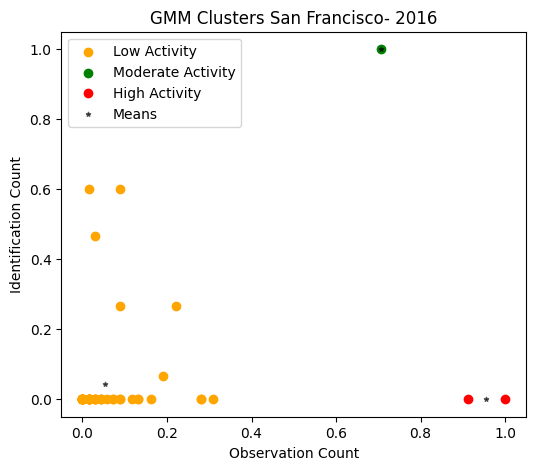

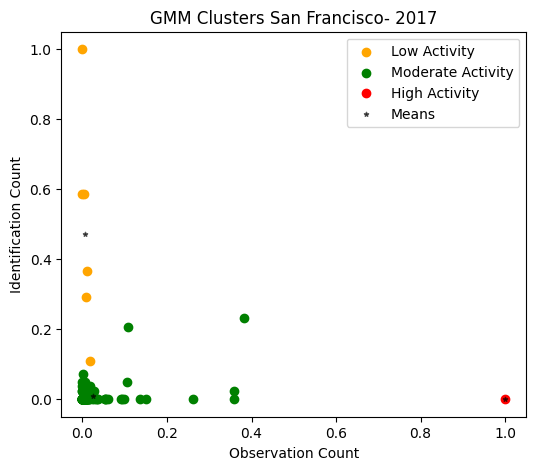

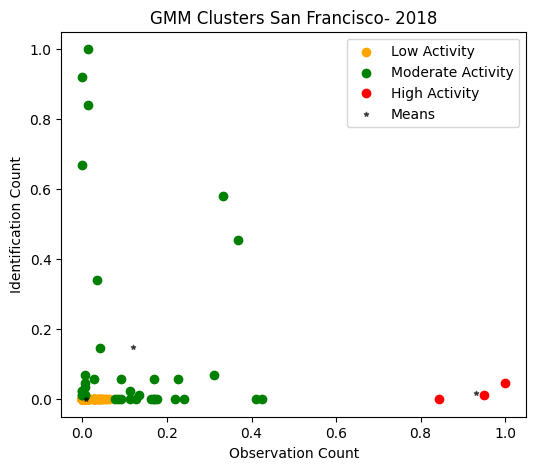

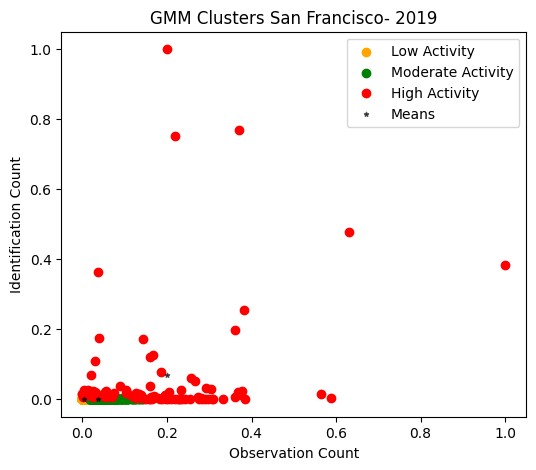

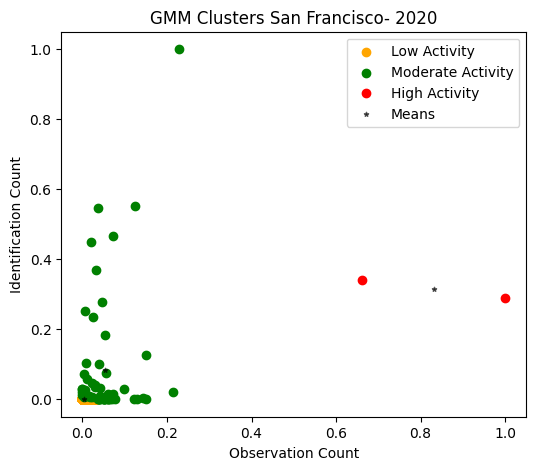

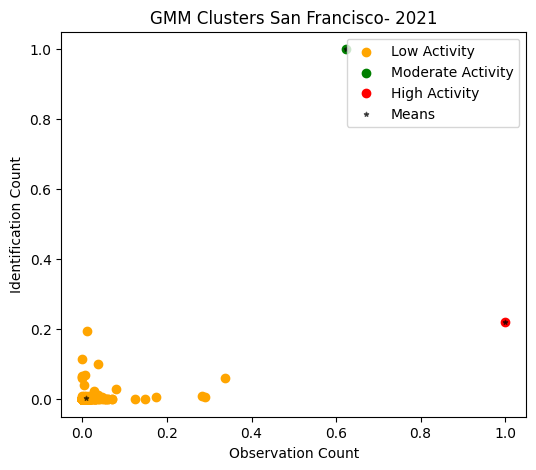

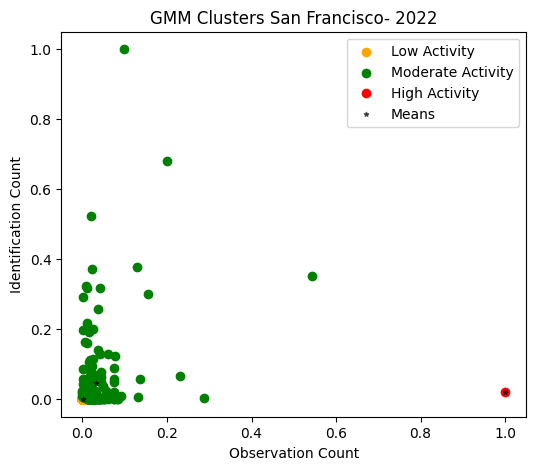

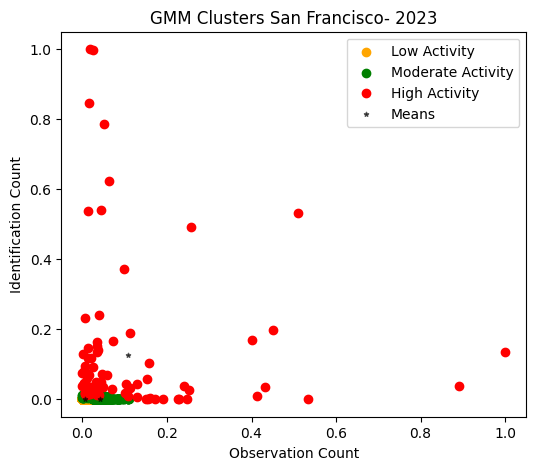

In [69]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = selectfeature(df)
    perform_gmm_clustering(df_processed, year)

## Evaluating the scores to find the better model

In [90]:
from sklearn.metrics import silhouette_score

In [93]:
def perform_kmeans_clustering(df, year):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df[['n_obs', 'n_idents']])
    df['cluster'] = kmeans.labels_
    
    # Calculate the sum of squared errors (SSE)
    sse = kmeans.inertia_
    
    return df, sse


In [94]:
# List of DataFrames and years
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Loop through each DataFrame andg year
silhouette_scores = []

for df, year in zip(df_list, years):

    # scale feature 
    df_std, scaler = selectfeature(df)
    
    # Perform K-means clustering
    df_clustered, sse = perform_kmeans_clustering(df_std, year)
    
    # get cluster lable
    clusters_kmeans = df_clustered['cluster'].values
    
    # Step 4: Calculate and store the Silhouette Score
    silhouette_avg = silhouette_score(df_std[['n_obs', 'n_idents']], clusters_kmeans)
    silhouette_scores.append((year, silhouette_avg))
    print(f"Silhouette Score for {year}: {silhouette_avg}")

# Print all silhouette scores
#print("\nSilhouette Scores by Year:")
#for year, score in silhouette_scores:
    #print(f"Year {year}: {score}")


Silhouette Score for 2016: 0.8182749933574202
Silhouette Score for 2017: 0.8813627513525406
Silhouette Score for 2018: 0.9140867308657826
Silhouette Score for 2019: 0.8906362429612339
Silhouette Score for 2020: 0.9531766040916072
Silhouette Score for 2021: 0.9779300656233435
Silhouette Score for 2022: 0.9868735003031668
Silhouette Score for 2023: 0.975362109760246
